#### Problem Statement

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [1]:
#importing necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('trainset.csv') #reading train.csv file from local system
train.head(2) #checking the first two rows of the train set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Exploratory Data Analysis :-

In [3]:
#Checking for any duplicate values in the dataframe
dup = train[train.duplicated()]
dup

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Above we can see that there are no duplicate values in the dataframe.

In [8]:
train.shape

(614, 13)

In [3]:
#For dropping off the duplicate values

train.drop_duplicates(inplace = True)
train.shape

(614, 13)

The Dataset has 614 rows and 13 columns in it

In [14]:
#checking the columns and there datatype as well as if these have any null values in it or not.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see above the column names. 

Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History are the features which have some missing values

There are 4 columns with float64 datatype.

1 column which is **ApplicantIncome** has **int64** datatype.

8 columns have object datatype which are our categorical columns.

This dataset mostly consists of categorical columns as we can see above.

In [4]:
# Lets check the null records now

rows_with_NaN = train[train.isnull().any(axis=1)]
rows_with_NaN

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


**We see above that there are 134 rows with null values in it**

In [5]:
# Filling up of missing values in the dataset.
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [6]:
#Checking for number of null values in the dataset in each of the columns

train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.drop(['Loan_ID'], inplace = True, axis =1) # Removing loan id from the dataset

In [4]:
train.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [9]:
#Lets group the entire dataset on the basis of gender to evaluate it

gender=  train.groupby(by = train['Gender']).mean()
gender

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5573.017928,1735.752829,150.861284,339.714868,0.844492


**We took the mean as there are less number of records of female as compared to male in the dataset which we have and we can clearly see that there is not much difference between males and females when comes to income, coapplicant income, loan amount, term and also credit history**

In [9]:
train.groupby(by = train['Married']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,,,,,
No,4970.384977,1316.558685,128.883495,351.115385,0.839196
Yes,5629.173367,1794.632965,155.750000,336.987147,0.842541


**We can see above that the LOANAMOUNT taken by Married people are more in proportion to the ones who are unmarried and can also see the mean data of both of different variables**

<AxesSubplot:xlabel='Gender', ylabel='count'>

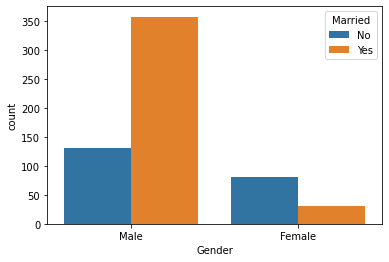

In [12]:
import seaborn as sns

sns.countplot(x= train['Gender'] , hue = train['Married'])

**Above chart is showing that mostly married males and unmarried females have taken loan**

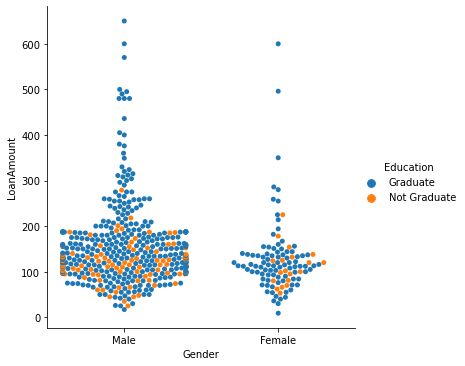

In [17]:
sns.catplot(x = "Gender", y = "LoanAmount", hue="Education", kind='swarm', data = train)

**Males and Females who are graduates are the ones who have mostly taken loan**

**Mostly are within the range of 100-200 for both females as well as males**

**There are very few not graduates who have taken loan and the loanamount taken by them is below 250k approx**

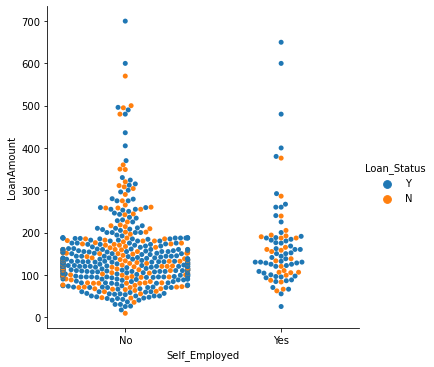

In [14]:
sns.catplot(x = "Self_Employed", y = "LoanAmount", hue="Loan_Status", kind='swarm', data = train)

**Mostly not self employed people have taken loan and loan status proportion are mostly equal**

**Few self employed have taken loan**

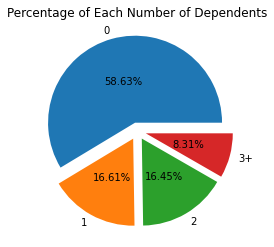

In [12]:
data = train['Dependents'].value_counts()
labels = data.keys()
plt.pie(x=data, labels = labels, autopct='%.2f%%',explode = [0.1]*4 ,pctdistance=0.50)
plt.title("Percentage of Each Number of Dependents")
plt.show()

**As we see in the above Pie Chart 59% people have no dependents at all and only 8% of the people have either 3 or more dependents**

Text(0.5, 1.0, 'Comparison between Laon Amount, Area and Status')

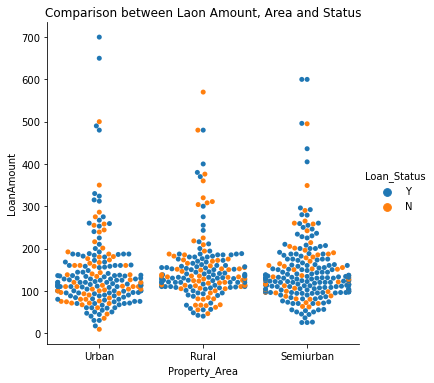

In [24]:
sns.catplot(x = "Property_Area", y = "LoanAmount", hue="Loan_Status", kind='swarm', data = train)
plt.title("Comparison between Laon Amount, Area and Status")

**Number of people from Semiurban areas are more who have applied for loans and most of them have paid back the amount**

**Highest Loan amount are taken by the people from urban areas and have been paid back by them**

**People who have failed to payback are mostly from Rural areas**

Text(0.5, 1.0, 'Comparison between Applicant Income, Credit History and Status')

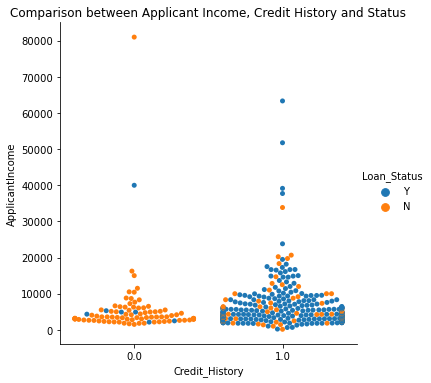

In [26]:
sns.catplot(x = "Credit_History", y = "ApplicantIncome", hue="Loan_Status", kind='swarm', data = train)
plt.title("Comparison between Applicant Income, Credit History and Status")

**People who do not have any credit history have mostly failed to payback whereas there income level is between 0- 20000 mostly and only 1 or 2 with 40000 and 80000 income, only few have paid it**

**Those who have credit history paid back there loans amd there level are within 40000 mostly**

**This plot depicts us that credit history is a very important variable for us**

Text(0.5, 1.0, 'Comparison between Loan_Amount_Term, LoanAmount and Status')

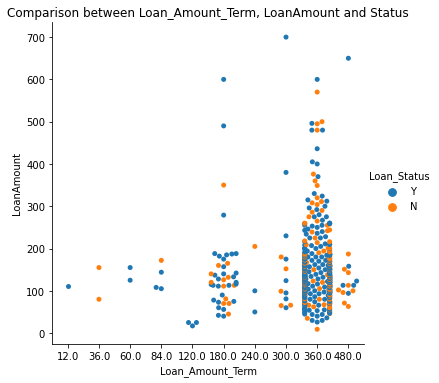

In [28]:
sns.catplot(x = "Loan_Amount_Term", y = "LoanAmount", hue="Loan_Status", kind='swarm', data = train)
plt.title("Comparison between Loan_Amount_Term, LoanAmount and Status")

**We see that people are mostly choosing 360 months of repayment period/loan Amount of term**

**Thee are very few people who opted for period of 60 months or less and there loan amount is also less i.e. within 200k**

(array([353., 160.,  38.,   9.,   8.,   3.,   2.]),
 array([ 50.        , 142.85714286, 235.71428571, 328.57142857,
        421.42857143, 514.28571429, 607.14285714, 700.        ]),
 <BarContainer object of 7 artists>)

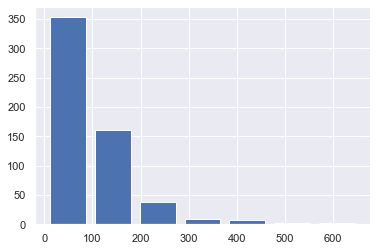

In [85]:
#Visualise the loan Amount
plt.hist(x = train['LoanAmount'], bins = 7, range=(50,700), density = False, cumulative = False, histtype = 'bar', align = 'left', rwidth=0.80)

<AxesSubplot:ylabel='Density'>

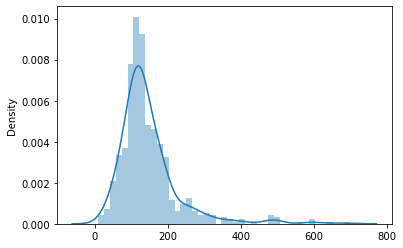

In [31]:
#lets check if it is skewed or not

sns.distplot(x = train['LoanAmount'])

**As we can see in the above figure the data is bit rightly skewed and are mostly between the range of 0 to 500**

Loan amounts taken are highest between the range of 0-100 thousand and the feature is skewed towards right side so we will use median in this case to fillup the missing values

In [90]:
#Lets check the statistics of the dataset now.
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We observe here that in the feature CoapplicantIncome the mininum is 0 which is practically not possible, difference between the 75th quartile and maximum is also too high.

In ApplicantIncome feature the difference between 75th and maximum is high which is not good, there is sign of outliers and skewness in it.

And in the fature LoanAmount there is too much difference between minimum and 25 % of the feature, also between the 75% quartile and maximum

There are signs of skewness and outliers.

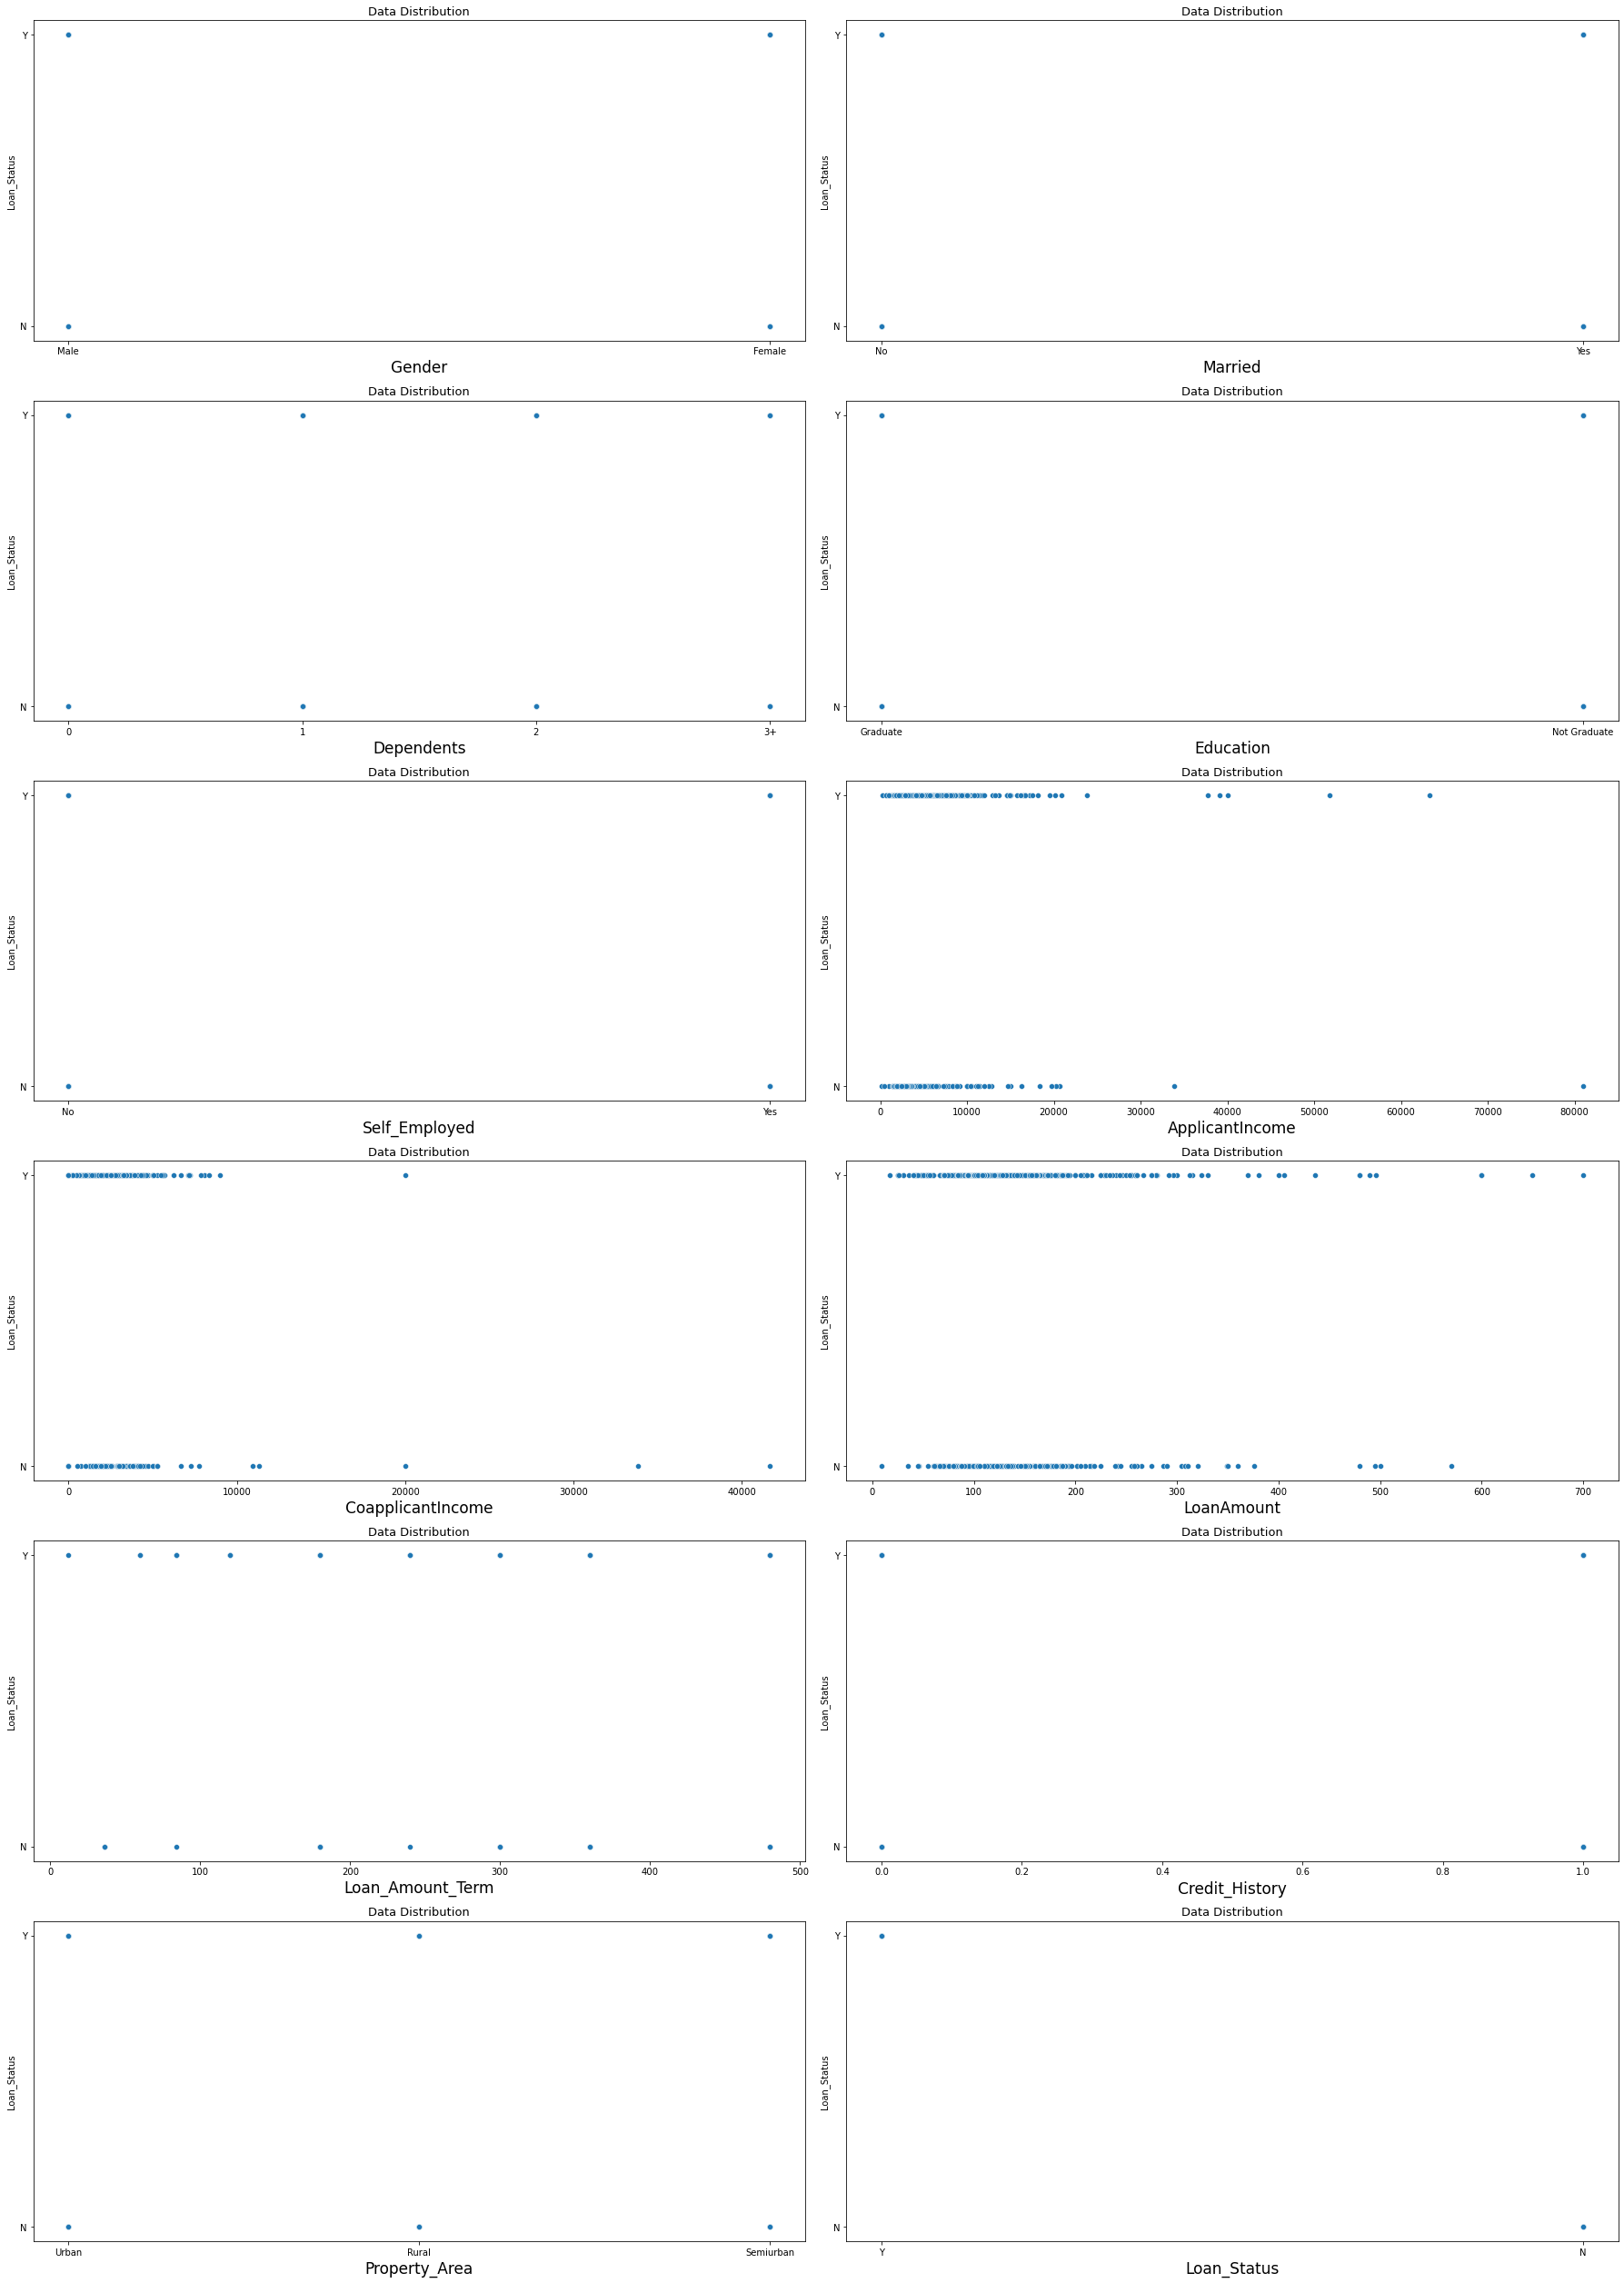

In [33]:
#Lets now plot scatter plot for each column in df with respect to price to understand the data.

plt.figure(figsize = [25,35])
plotnumber = 1

for column in train:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.scatterplot(x = train[column], y= train['Loan_Status'])
        plt.xlabel(column, fontsize = 17)
        plt.title("Data Distribution", fontsize = 13)
    plotnumber += 1
plt.tight_layout()


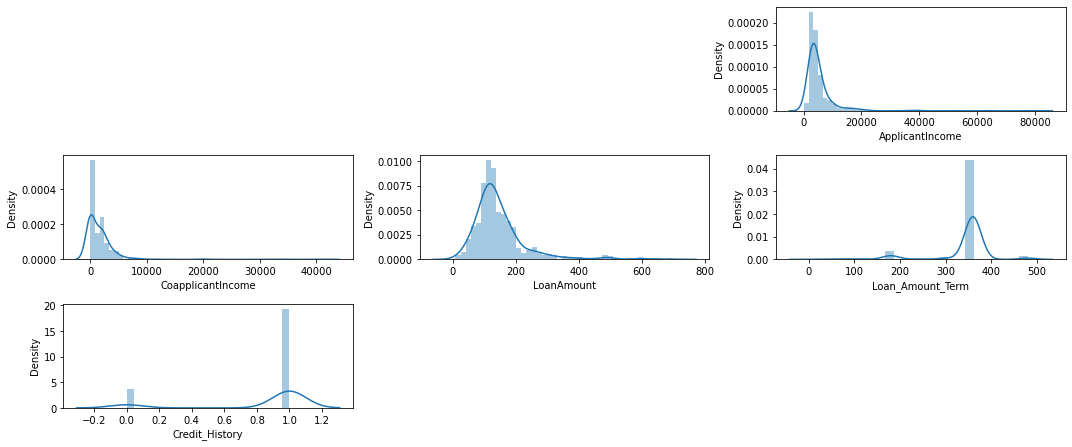

In [42]:
plt.figure(figsize=[15,10])
plotnumber = 1

for column in train:
    if train[column].dtypes=="int64" or train[column].dtypes=="float64" and plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

**There is skewness in three of the variables which are Applicant Income, Co-applicant Income and Loan Amount and are skewed right**

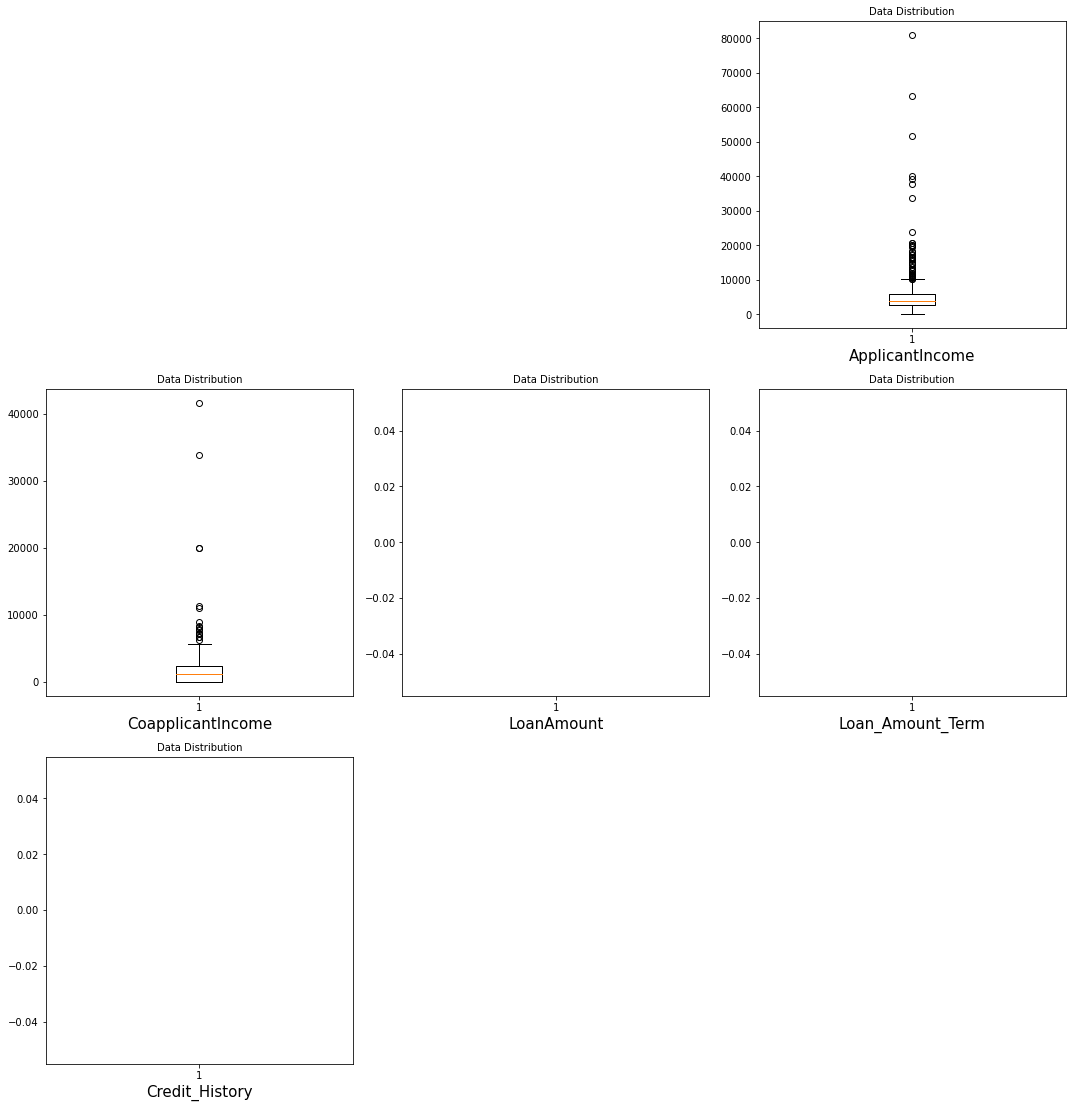

In [43]:
#Checking for outliers in the dataset.

plt.figure(figsize = [15,25])
plotnumber = 1

for column in train:
    if train[column].dtypes=="int64" or train[column].dtypes=="float64" and plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        plt.boxplot(x = train[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

**As we can see in the above figure that the outliers are present in the variables Co-applicant Income and Applicant Income**

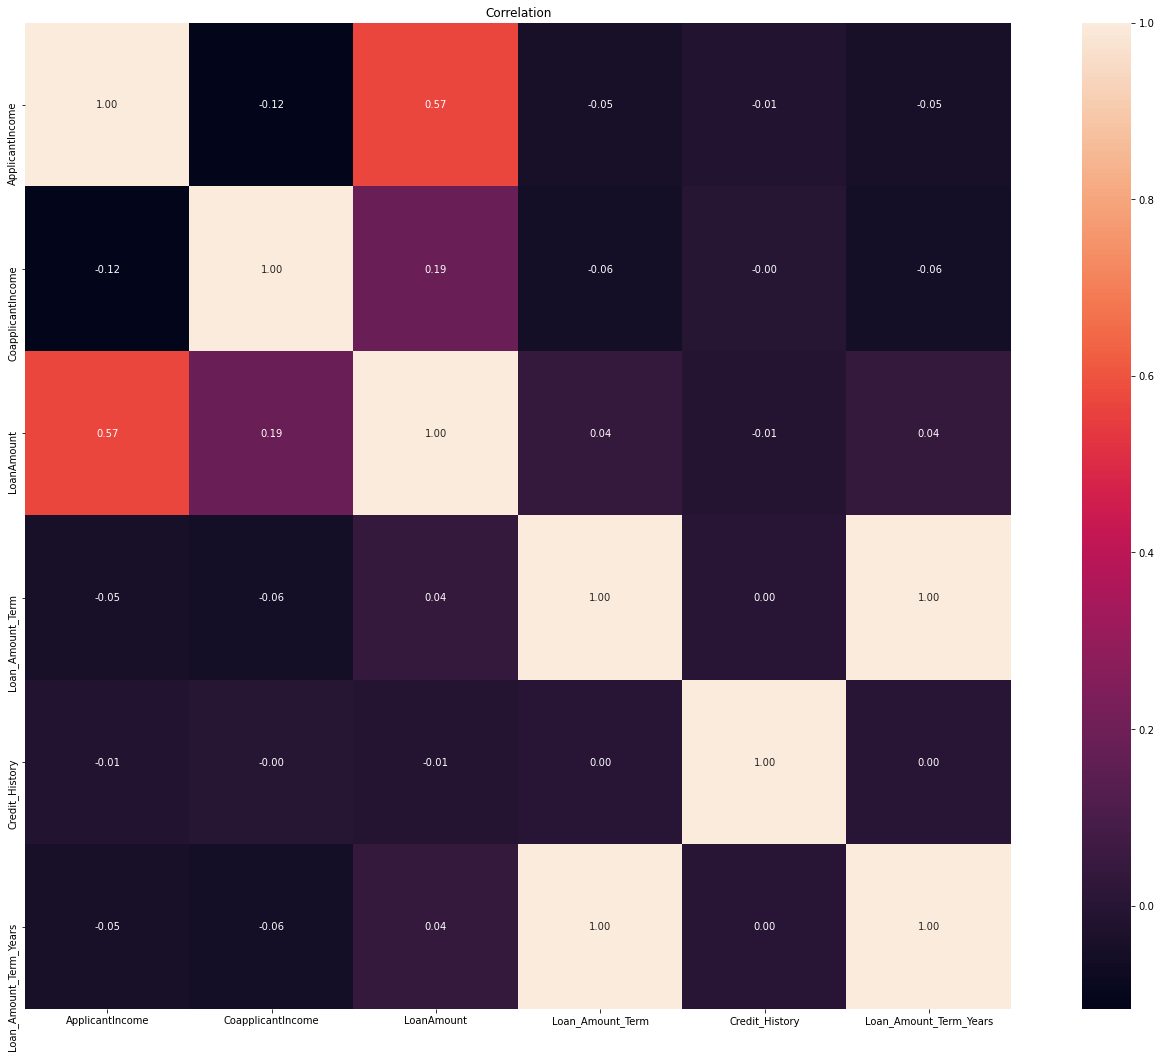

In [44]:
plt.figure(figsize = [20,15])
sns.heatmap(train.corr(),annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [129]:
#Doing further analysis

Gender = train.groupby(by='Gender').mean()
Gender

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term_Years
Gender,,,,,
Female,4643.473214,1914.491071,126.732143,0.848214,29.375000
Male,5573.017928,2202.156215,149.996016,0.856574,28.346614


We can see here that the amount of loan taken by male's are high when compared with females but the females took the loan amount for a longer period of time.

In [133]:
Graduates = train.groupby(by='Education').mean()
Graduates

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Amount_Term_Years
Education,,,,,
Graduate,5857.433333,2264.680042,153.245833,0.86875,28.743750
Not Graduate,3777.283582,1737.753731,118.910448,0.80597,27.783582


Above figures shows us that those who are graduates have taken more loan and also for a longer term when compared with Not Graduates

In [138]:
Married = train.groupby(by='Married').mean()
Dependents = train.groupby(by='Dependents').mean()
Self_Employed = train.groupby(by='Self_Employed').mean()
Property_Area = train.groupby(by='Property_Area').mean()
print("\n\n",Married)
print("\n\n",Dependents)
print("\n\n",Self_Employed)
print("\n\n",Property_Area)



          ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
Married                                                                   
No           4970.384977        2114.471831   128.85446        0.849765   
Yes          5633.496259        2168.386334   154.72818        0.857855   

         Loan_Amount_Term_Years  
Married                          
No                    29.276995  
Yes                   28.139651  


             ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  \
Dependents                                                                   
0               4928.680556        2145.610056  135.330556        0.861111   
1               5962.274510        1927.269608  157.421569        0.862745   
2               4926.782178        2122.636634  149.564356        0.861386   
3+              8581.215686        2676.823529  188.431373        0.784314   

            Loan_Amount_Term_Years  
Dependents                          
0             

These are the categorical columns as we can see that there are more number of females who applied and less females, married are more, those who have no dependents are also more and most of them are graduates and not self employed.

**Data Cleaning**

In [6]:
#Filling up the null categorical columns with mode of each column

train['Gender'].fillna(train['Gender'].mode()[0], inplace  = True)
train['Married'].fillna(train['Married'].mode()[0], inplace  = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace  = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace  = True)

In [9]:
#Let's now convert all the nominal data using one hot encoding technique

train = pd.get_dummies(train, columns=['Gender','Married','Education','Property_Area'], drop_first = True)

In [10]:
train = pd.get_dummies(train, columns=['Self_Employed'], drop_first = True)

In [11]:
train['Dependents'] = train['Dependents'].str.rstrip('+')
train.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,1,0


In [ ]:
train['Loan_Status'].replace({'N':0,'Y':1},inplace=True)

In [23]:
#Filling up all the continous variables using Knn imputer with n-neighbors as 5

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train = pd.DataFrame(imputer.fit_transform(train),columns = train.columns)
train.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5849.0,0.0,147.8,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [24]:
train.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Self_Employed_Yes          0
dtype: int64

In [28]:
zero = len(train[train['CoapplicantIncome'] == 0])/len(train)
zero * 100

44.462540716612374

44.46% of the data in CoapplicantIncome column consists of zero values hence we will drop the variable for model building

In [29]:
train.drop(['CoapplicantIncome'], axis = 1, inplace = True)
train.head(6)

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5849.0,147.8,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,4583.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,3000.0,66.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.0,2583.0,120.0,360.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.0,6000.0,141.0,360.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,2.0,5417.0,267.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [30]:
train.skew()

Dependents                 1.015551
ApplicantIncome            6.539513
LoanAmount                 2.678321
Loan_Amount_Term          -2.379668
Credit_History            -1.922231
Loan_Status               -0.809998
Gender_Male               -1.648795
Married_Yes               -0.644850
Education_Not Graduate     1.367622
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
Self_Employed_Yes          2.159796
dtype: float64

In [31]:
#Using Qunatile method to remove the skewness from the above columns

q = train['ApplicantIncome'].quantile(0.99)
train = train[train['ApplicantIncome']<q]

q = train['LoanAmount'].quantile(0.99)
train = train[train['LoanAmount']<q]

train.skew()

Dependents                 1.026958
ApplicantIncome            2.278770
LoanAmount                 1.519564
Loan_Amount_Term          -2.423328
Credit_History            -1.931955
Loan_Status               -0.818455
Gender_Male               -1.635600
Married_Yes               -0.625153
Education_Not Graduate     1.326765
Property_Area_Semiurban    0.504799
Property_Area_Urban        0.727640
Self_Employed_Yes          2.200213
dtype: float64

In [44]:
x = train.drop(['Loan_Status'], axis = 1)
y = train['Loan_Status']

In [33]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

for column in x:
    if x[column].dtypes=="int64" or x[column].dtypes=="float64":
        z = np.abs(stats.zscore(x[column]))
        i = np.where(z>3)[0]
print(z)

0      0.387298
1      0.387298
2      2.581989
3      0.387298
4      0.387298
         ...   
609    0.387298
610    0.387298
611    0.387298
612    0.387298
613    2.581989
Name: Self_Employed_Yes, Length: 598, dtype: float64


In [45]:
x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [39]:
y.value_counts()

1.0    412
0.0    186
Name: Loan_Status, dtype: int64

* We can clearly see here that there is very high imbalance in it hene we will use smote to balance the dataset

In [46]:
#Data Balancing using Smote as there was lot of imbalance in the labe;
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors = 4)
X, Y = oversample.fit_resample(x, y)
Y.value_counts()

0.0    412
1.0    412
Name: Loan_Status, dtype: int64

**We have balanced the dataset using smote as we can see above in the dataset**

### Model Building

In [47]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.20, random_state = 100)

In [51]:
#Importing necessary metrics to build the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [50]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [52]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()
cb = CatBoostClassifier()

In [53]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)
cb.fit(x_train,y_train)

print("All Models Trained")

[20:37:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.008622
0:	learn: 0.6884914	total: 218ms	remaining: 3m 38s
1:	learn: 0.6837311	total: 230ms	remaining: 1m 54s
2:	learn: 0.6780817	total: 240ms	remaining: 1m 19s
3:	learn: 0.6733154	total: 251ms	remaining: 1m 2s
4:	learn: 0.6684648	total: 260ms	remaining: 51.8s
5:	learn: 0.6639683	total: 270ms	remaining: 44.8s
6:	learn: 0.6596253	total: 280ms	remaining: 39.7s
7:	learn: 0.6547181	total: 289ms	remaining: 35.9s
8:	learn: 0.6500966	total: 299ms	remaining: 32.9s
9:	learn: 0.6456488	total: 308ms	remaining: 30.5s
10:	learn: 0.6412775	total: 316ms	remaining: 28.4s
11:	learn: 0.6374206	total: 325ms	remaining: 26.7s
12:	learn: 0.6339206	total: 333ms	remaining: 25.3s
13:	

161:	learn: 0.3798800	total: 1.09s	remaining: 5.64s
162:	learn: 0.3793807	total: 1.1s	remaining: 5.63s
163:	learn: 0.3787714	total: 1.1s	remaining: 5.61s
164:	learn: 0.3782420	total: 1.11s	remaining: 5.6s
165:	learn: 0.3778573	total: 1.11s	remaining: 5.58s
166:	learn: 0.3774536	total: 1.11s	remaining: 5.56s
167:	learn: 0.3769213	total: 1.12s	remaining: 5.54s
168:	learn: 0.3762024	total: 1.12s	remaining: 5.52s
169:	learn: 0.3752013	total: 1.13s	remaining: 5.5s
170:	learn: 0.3747288	total: 1.13s	remaining: 5.48s
171:	learn: 0.3739480	total: 1.13s	remaining: 5.46s
172:	learn: 0.3732300	total: 1.14s	remaining: 5.45s
173:	learn: 0.3727170	total: 1.14s	remaining: 5.43s
174:	learn: 0.3721838	total: 1.15s	remaining: 5.42s
175:	learn: 0.3715619	total: 1.15s	remaining: 5.4s
176:	learn: 0.3709419	total: 1.16s	remaining: 5.38s
177:	learn: 0.3704169	total: 1.16s	remaining: 5.37s
178:	learn: 0.3697839	total: 1.17s	remaining: 5.35s
179:	learn: 0.3692207	total: 1.17s	remaining: 5.34s
180:	learn: 0.368

357:	learn: 0.3013845	total: 1.99s	remaining: 3.56s
358:	learn: 0.3009825	total: 1.99s	remaining: 3.56s
359:	learn: 0.3007982	total: 2s	remaining: 3.55s
360:	learn: 0.3005710	total: 2s	remaining: 3.55s
361:	learn: 0.3002172	total: 2.01s	remaining: 3.54s
362:	learn: 0.3000386	total: 2.01s	remaining: 3.53s
363:	learn: 0.2997319	total: 2.02s	remaining: 3.53s
364:	learn: 0.2994450	total: 2.02s	remaining: 3.52s
365:	learn: 0.2992285	total: 2.03s	remaining: 3.51s
366:	learn: 0.2988969	total: 2.03s	remaining: 3.51s
367:	learn: 0.2985281	total: 2.04s	remaining: 3.5s
368:	learn: 0.2981967	total: 2.04s	remaining: 3.49s
369:	learn: 0.2980053	total: 2.05s	remaining: 3.49s
370:	learn: 0.2977908	total: 2.05s	remaining: 3.48s
371:	learn: 0.2975519	total: 2.06s	remaining: 3.47s
372:	learn: 0.2970553	total: 2.06s	remaining: 3.46s
373:	learn: 0.2968562	total: 2.06s	remaining: 3.46s
374:	learn: 0.2965208	total: 2.07s	remaining: 3.45s
375:	learn: 0.2960951	total: 2.08s	remaining: 3.44s
376:	learn: 0.29593

547:	learn: 0.2548402	total: 2.87s	remaining: 2.36s
548:	learn: 0.2545724	total: 2.87s	remaining: 2.36s
549:	learn: 0.2543366	total: 2.88s	remaining: 2.35s
550:	learn: 0.2541265	total: 2.88s	remaining: 2.35s
551:	learn: 0.2538404	total: 2.89s	remaining: 2.34s
552:	learn: 0.2537190	total: 2.89s	remaining: 2.34s
553:	learn: 0.2534225	total: 2.9s	remaining: 2.33s
554:	learn: 0.2532606	total: 2.9s	remaining: 2.33s
555:	learn: 0.2530676	total: 2.91s	remaining: 2.32s
556:	learn: 0.2529081	total: 2.91s	remaining: 2.31s
557:	learn: 0.2526935	total: 2.92s	remaining: 2.31s
558:	learn: 0.2524967	total: 2.92s	remaining: 2.3s
559:	learn: 0.2523964	total: 2.93s	remaining: 2.3s
560:	learn: 0.2523001	total: 2.93s	remaining: 2.29s
561:	learn: 0.2521600	total: 2.94s	remaining: 2.29s
562:	learn: 0.2519845	total: 2.94s	remaining: 2.28s
563:	learn: 0.2518229	total: 2.94s	remaining: 2.28s
564:	learn: 0.2515325	total: 2.95s	remaining: 2.27s
565:	learn: 0.2514045	total: 2.95s	remaining: 2.26s
566:	learn: 0.25

737:	learn: 0.2195208	total: 3.75s	remaining: 1.33s
738:	learn: 0.2193543	total: 3.75s	remaining: 1.32s
739:	learn: 0.2192723	total: 3.76s	remaining: 1.32s
740:	learn: 0.2189802	total: 3.76s	remaining: 1.31s
741:	learn: 0.2188408	total: 3.76s	remaining: 1.31s
742:	learn: 0.2186232	total: 3.77s	remaining: 1.3s
743:	learn: 0.2184585	total: 3.77s	remaining: 1.3s
744:	learn: 0.2183670	total: 3.78s	remaining: 1.29s
745:	learn: 0.2181538	total: 3.78s	remaining: 1.29s
746:	learn: 0.2179768	total: 3.79s	remaining: 1.28s
747:	learn: 0.2177249	total: 3.79s	remaining: 1.28s
748:	learn: 0.2175950	total: 3.79s	remaining: 1.27s
749:	learn: 0.2174710	total: 3.8s	remaining: 1.27s
750:	learn: 0.2170983	total: 3.8s	remaining: 1.26s
751:	learn: 0.2169894	total: 3.81s	remaining: 1.25s
752:	learn: 0.2167499	total: 3.81s	remaining: 1.25s
753:	learn: 0.2166005	total: 3.82s	remaining: 1.25s
754:	learn: 0.2164380	total: 3.82s	remaining: 1.24s
755:	learn: 0.2161939	total: 3.83s	remaining: 1.24s
756:	learn: 0.21

929:	learn: 0.1896528	total: 4.63s	remaining: 348ms
930:	learn: 0.1895870	total: 4.63s	remaining: 343ms
931:	learn: 0.1894236	total: 4.64s	remaining: 338ms
932:	learn: 0.1892791	total: 4.64s	remaining: 333ms
933:	learn: 0.1890637	total: 4.65s	remaining: 328ms
934:	learn: 0.1887997	total: 4.65s	remaining: 323ms
935:	learn: 0.1887166	total: 4.66s	remaining: 318ms
936:	learn: 0.1885700	total: 4.66s	remaining: 313ms
937:	learn: 0.1884928	total: 4.67s	remaining: 308ms
938:	learn: 0.1883814	total: 4.67s	remaining: 303ms
939:	learn: 0.1883040	total: 4.67s	remaining: 298ms
940:	learn: 0.1881341	total: 4.68s	remaining: 293ms
941:	learn: 0.1879167	total: 4.68s	remaining: 288ms
942:	learn: 0.1877554	total: 4.69s	remaining: 283ms
943:	learn: 0.1876213	total: 4.69s	remaining: 278ms
944:	learn: 0.1875096	total: 4.7s	remaining: 274ms
945:	learn: 0.1873904	total: 4.7s	remaining: 268ms
946:	learn: 0.1872281	total: 4.71s	remaining: 263ms
947:	learn: 0.1871031	total: 4.71s	remaining: 259ms
948:	learn: 0.

In [55]:
#Accuracy score
print('Logistic Regression =', accuracy_score(y_test,lr.predict(x_test)))
print('Decision Tree =', accuracy_score(y_test,dt.predict(x_test)))
print('Random Forest =', accuracy_score(y_test,rf.predict(x_test)))
print('SVC =', accuracy_score(y_test,svc.predict(x_test)))
print('Xtreme Gradient Boost =', accuracy_score(y_test,xgb.predict(x_test)))
print('Cat Boost =', accuracy_score(y_test,cb.predict(x_test)))

Logistic Regression = 0.7212121212121212
Decision Tree = 0.806060606060606
Random Forest = 0.8181818181818182
SVC = 0.7696969696969697
Xtreme Gradient Boost = 0.7878787878787878
Cat Boost = 0.8242424242424242


In [56]:
#Lets check the roc_auc_score of every model

print('Logistic Regression =', roc_auc_score(y_test,lr.predict(x_test)))
print('Decision Tree =', roc_auc_score(y_test,dt.predict(x_test)))
print('Random Forest =', roc_auc_score(y_test,rf.predict(x_test)))
print('SVC =', roc_auc_score(y_test,svc.predict(x_test)))
print('Xtreme Gradient Boost =', roc_auc_score(y_test,xgb.predict(x_test)))
print('Cat Boost =', roc_auc_score(y_test,cb.predict(x_test)))

Logistic Regression = 0.7223038495445195
Decision Tree = 0.8063473405818394
Random Forest = 0.818542462533059
SVC = 0.7705700852189244
Xtreme Gradient Boost = 0.7879811930649427
Cat Boost = 0.8248604172788715


In [58]:
#Classification Report

print('Classification report of Logistic Regression \n', classification_report(y_test,lr.predict(x_test)))
print('Classification report of Decision Tree \n', classification_report(y_test,dt.predict(x_test)))
print('Classification report of Random Forest \n', classification_report(y_test,rf.predict(x_test)))
print('Classification report of SVC \n', classification_report(y_test,svc.predict(x_test)))
print('Classification report of Xtreme Gradient Boost \n', classification_report(y_test,xgb.predict(x_test)))
print('Cat Boost \n', classification_report(y_test,cb.predict(x_test)))

Classification report of Logistic Regression 
               precision    recall  f1-score   support

         0.0       0.85      0.54      0.66        83
         1.0       0.66      0.90      0.76        82

    accuracy                           0.72       165
   macro avg       0.75      0.72      0.71       165
weighted avg       0.76      0.72      0.71       165

Classification report of Decision Tree 
               precision    recall  f1-score   support

         0.0       0.84      0.76      0.80        83
         1.0       0.78      0.85      0.81        82

    accuracy                           0.81       165
   macro avg       0.81      0.81      0.81       165
weighted avg       0.81      0.81      0.81       165

Classification report of Random Forest 
               precision    recall  f1-score   support

         0.0       0.86      0.76      0.81        83
         1.0       0.78      0.88      0.83        82

    accuracy                           0.82       165

In [59]:
print('Confusion Matrix of Logistic Regression\n', confusion_matrix(y_test,lr.predict(x_test)))
print('Confusion Matrix of Decision Tree\n', confusion_matrix(y_test,dt.predict(x_test)))
print('Confusion Matrix of Random Forest \n', confusion_matrix(y_test,rf.predict(x_test)))
print('Confusion Matrix of SVC \n', confusion_matrix(y_test,svc.predict(x_test)))
print('Confusion Matrix of Xtreme Gradient Boost \n', confusion_matrix(y_test,xgb.predict(x_test)))
print('Confusion Matrix of Cat Boost \n', confusion_matrix(y_test,cb.predict(x_test)))

Confusion Matrix of Logistic Regression
 [[45 38]
 [ 8 74]]
Confusion Matrix of Decision Tree
 [[63 20]
 [12 70]]
Confusion Matrix of Random Forest 
 [[63 20]
 [10 72]]
Confusion Matrix of SVC 
 [[52 31]
 [ 7 75]]
Confusion Matrix of Xtreme Gradient Boost 
 [[64 19]
 [16 66]]
Confusion Matrix of Cat Boost 
 [[60 23]
 [ 6 76]]


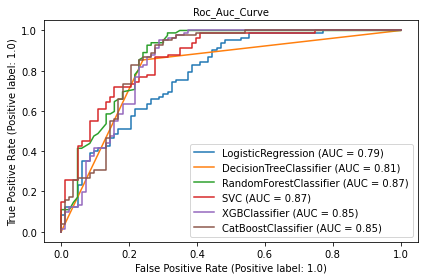

In [60]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plot_roc_curve(xgb,x_test,y_test,ax=curve.ax_)

plot_roc_curve(cb,x_test,y_test,ax=curve.ax_)


plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

In [61]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(cb,x,y,cv=5)

cvs.mean()

Learning rate set to 0.007517
0:	learn: 0.6887316	total: 5.79ms	remaining: 5.78s
1:	learn: 0.6848794	total: 11.9ms	remaining: 5.95s
2:	learn: 0.6809070	total: 17.9ms	remaining: 5.96s
3:	learn: 0.6772810	total: 23.8ms	remaining: 5.93s
4:	learn: 0.6733881	total: 29.7ms	remaining: 5.92s
5:	learn: 0.6696566	total: 34.4ms	remaining: 5.69s
6:	learn: 0.6655344	total: 39.8ms	remaining: 5.65s
7:	learn: 0.6619718	total: 45.8ms	remaining: 5.68s
8:	learn: 0.6581384	total: 52ms	remaining: 5.73s
9:	learn: 0.6549229	total: 54.7ms	remaining: 5.42s
10:	learn: 0.6514919	total: 58.8ms	remaining: 5.29s
11:	learn: 0.6478018	total: 64.5ms	remaining: 5.31s
12:	learn: 0.6441290	total: 70.2ms	remaining: 5.33s
13:	learn: 0.6404759	total: 76.2ms	remaining: 5.37s
14:	learn: 0.6372645	total: 81.6ms	remaining: 5.36s
15:	learn: 0.6339699	total: 87ms	remaining: 5.35s
16:	learn: 0.6308002	total: 92.2ms	remaining: 5.33s
17:	learn: 0.6278901	total: 97.7ms	remaining: 5.33s
18:	learn: 0.6251027	total: 101ms	remaining: 5.2

169:	learn: 0.4327874	total: 819ms	remaining: 4s
170:	learn: 0.4322722	total: 822ms	remaining: 3.99s
171:	learn: 0.4317904	total: 826ms	remaining: 3.98s
172:	learn: 0.4311642	total: 830ms	remaining: 3.97s
173:	learn: 0.4304040	total: 834ms	remaining: 3.96s
174:	learn: 0.4300527	total: 837ms	remaining: 3.95s
175:	learn: 0.4295514	total: 841ms	remaining: 3.94s
176:	learn: 0.4291212	total: 844ms	remaining: 3.92s
177:	learn: 0.4285728	total: 847ms	remaining: 3.91s
178:	learn: 0.4279937	total: 851ms	remaining: 3.9s
179:	learn: 0.4274664	total: 855ms	remaining: 3.9s
180:	learn: 0.4271032	total: 859ms	remaining: 3.89s
181:	learn: 0.4268659	total: 864ms	remaining: 3.88s
182:	learn: 0.4262207	total: 868ms	remaining: 3.88s
183:	learn: 0.4261142	total: 870ms	remaining: 3.86s
184:	learn: 0.4254478	total: 874ms	remaining: 3.85s
185:	learn: 0.4250357	total: 879ms	remaining: 3.85s
186:	learn: 0.4241956	total: 883ms	remaining: 3.84s
187:	learn: 0.4236340	total: 887ms	remaining: 3.83s
188:	learn: 0.423

358:	learn: 0.3645280	total: 1.67s	remaining: 2.98s
359:	learn: 0.3643664	total: 1.67s	remaining: 2.98s
360:	learn: 0.3641443	total: 1.68s	remaining: 2.97s
361:	learn: 0.3639424	total: 1.68s	remaining: 2.97s
362:	learn: 0.3637515	total: 1.69s	remaining: 2.96s
363:	learn: 0.3634592	total: 1.69s	remaining: 2.95s
364:	learn: 0.3630505	total: 1.69s	remaining: 2.94s
365:	learn: 0.3629313	total: 1.69s	remaining: 2.93s
366:	learn: 0.3626772	total: 1.7s	remaining: 2.93s
367:	learn: 0.3623468	total: 1.7s	remaining: 2.92s
368:	learn: 0.3620823	total: 1.7s	remaining: 2.91s
369:	learn: 0.3619258	total: 1.71s	remaining: 2.9s
370:	learn: 0.3616647	total: 1.71s	remaining: 2.9s
371:	learn: 0.3612613	total: 1.71s	remaining: 2.89s
372:	learn: 0.3610243	total: 1.72s	remaining: 2.89s
373:	learn: 0.3607567	total: 1.72s	remaining: 2.88s
374:	learn: 0.3605536	total: 1.73s	remaining: 2.88s
375:	learn: 0.3600093	total: 1.73s	remaining: 2.87s
376:	learn: 0.3596996	total: 1.73s	remaining: 2.86s
377:	learn: 0.359

545:	learn: 0.3219097	total: 2.52s	remaining: 2.09s
546:	learn: 0.3217392	total: 2.52s	remaining: 2.09s
547:	learn: 0.3214743	total: 2.53s	remaining: 2.09s
548:	learn: 0.3211706	total: 2.53s	remaining: 2.08s
549:	learn: 0.3209199	total: 2.54s	remaining: 2.08s
550:	learn: 0.3207054	total: 2.54s	remaining: 2.07s
551:	learn: 0.3206315	total: 2.55s	remaining: 2.07s
552:	learn: 0.3205152	total: 2.55s	remaining: 2.06s
553:	learn: 0.3203385	total: 2.56s	remaining: 2.06s
554:	learn: 0.3202275	total: 2.56s	remaining: 2.05s
555:	learn: 0.3200704	total: 2.56s	remaining: 2.05s
556:	learn: 0.3195910	total: 2.57s	remaining: 2.04s
557:	learn: 0.3195170	total: 2.57s	remaining: 2.04s
558:	learn: 0.3193419	total: 2.57s	remaining: 2.03s
559:	learn: 0.3191054	total: 2.58s	remaining: 2.03s
560:	learn: 0.3187281	total: 2.58s	remaining: 2.02s
561:	learn: 0.3185871	total: 2.59s	remaining: 2.02s
562:	learn: 0.3185109	total: 2.59s	remaining: 2.01s
563:	learn: 0.3183038	total: 2.59s	remaining: 2s
564:	learn: 0.3

729:	learn: 0.2901745	total: 3.38s	remaining: 1.25s
730:	learn: 0.2900060	total: 3.38s	remaining: 1.25s
731:	learn: 0.2899380	total: 3.39s	remaining: 1.24s
732:	learn: 0.2897364	total: 3.39s	remaining: 1.24s
733:	learn: 0.2894803	total: 3.4s	remaining: 1.23s
734:	learn: 0.2891455	total: 3.4s	remaining: 1.23s
735:	learn: 0.2888639	total: 3.4s	remaining: 1.22s
736:	learn: 0.2887755	total: 3.41s	remaining: 1.22s
737:	learn: 0.2887632	total: 3.41s	remaining: 1.21s
738:	learn: 0.2887287	total: 3.42s	remaining: 1.21s
739:	learn: 0.2885767	total: 3.42s	remaining: 1.2s
740:	learn: 0.2884410	total: 3.43s	remaining: 1.2s
741:	learn: 0.2882402	total: 3.43s	remaining: 1.19s
742:	learn: 0.2880084	total: 3.44s	remaining: 1.19s
743:	learn: 0.2878889	total: 3.44s	remaining: 1.18s
744:	learn: 0.2877255	total: 3.45s	remaining: 1.18s
745:	learn: 0.2876748	total: 3.45s	remaining: 1.18s
746:	learn: 0.2875685	total: 3.46s	remaining: 1.17s
747:	learn: 0.2875250	total: 3.46s	remaining: 1.17s
748:	learn: 0.287

904:	learn: 0.2644093	total: 4.22s	remaining: 443ms
905:	learn: 0.2643822	total: 4.22s	remaining: 438ms
906:	learn: 0.2641648	total: 4.23s	remaining: 433ms
907:	learn: 0.2641084	total: 4.23s	remaining: 429ms
908:	learn: 0.2640721	total: 4.23s	remaining: 424ms
909:	learn: 0.2639915	total: 4.24s	remaining: 419ms
910:	learn: 0.2637640	total: 4.24s	remaining: 415ms
911:	learn: 0.2636840	total: 4.25s	remaining: 410ms
912:	learn: 0.2634725	total: 4.25s	remaining: 405ms
913:	learn: 0.2633200	total: 4.25s	remaining: 400ms
914:	learn: 0.2631048	total: 4.26s	remaining: 396ms
915:	learn: 0.2628734	total: 4.26s	remaining: 391ms
916:	learn: 0.2627665	total: 4.26s	remaining: 386ms
917:	learn: 0.2625399	total: 4.27s	remaining: 381ms
918:	learn: 0.2624609	total: 4.27s	remaining: 377ms
919:	learn: 0.2622346	total: 4.28s	remaining: 372ms
920:	learn: 0.2621614	total: 4.28s	remaining: 367ms
921:	learn: 0.2619822	total: 4.29s	remaining: 363ms
922:	learn: 0.2618615	total: 4.29s	remaining: 358ms
923:	learn: 

74:	learn: 0.5059390	total: 326ms	remaining: 4.02s
75:	learn: 0.5047777	total: 331ms	remaining: 4.03s
76:	learn: 0.5034452	total: 335ms	remaining: 4.02s
77:	learn: 0.5019577	total: 340ms	remaining: 4.01s
78:	learn: 0.5001629	total: 343ms	remaining: 4s
79:	learn: 0.4988283	total: 346ms	remaining: 3.98s
80:	learn: 0.4974545	total: 349ms	remaining: 3.96s
81:	learn: 0.4962281	total: 353ms	remaining: 3.95s
82:	learn: 0.4950727	total: 356ms	remaining: 3.93s
83:	learn: 0.4937420	total: 359ms	remaining: 3.91s
84:	learn: 0.4925370	total: 361ms	remaining: 3.89s
85:	learn: 0.4915869	total: 365ms	remaining: 3.88s
86:	learn: 0.4901104	total: 370ms	remaining: 3.88s
87:	learn: 0.4888199	total: 373ms	remaining: 3.87s
88:	learn: 0.4876591	total: 377ms	remaining: 3.86s
89:	learn: 0.4868403	total: 379ms	remaining: 3.83s
90:	learn: 0.4856585	total: 383ms	remaining: 3.83s
91:	learn: 0.4845801	total: 386ms	remaining: 3.81s
92:	learn: 0.4835418	total: 390ms	remaining: 3.8s
93:	learn: 0.4825178	total: 393ms	r

246:	learn: 0.3961170	total: 1.01s	remaining: 3.08s
247:	learn: 0.3957242	total: 1.02s	remaining: 3.08s
248:	learn: 0.3954160	total: 1.02s	remaining: 3.08s
249:	learn: 0.3950204	total: 1.02s	remaining: 3.07s
250:	learn: 0.3949092	total: 1.03s	remaining: 3.06s
251:	learn: 0.3947302	total: 1.03s	remaining: 3.06s
252:	learn: 0.3942803	total: 1.03s	remaining: 3.06s
253:	learn: 0.3939098	total: 1.04s	remaining: 3.05s
254:	learn: 0.3935761	total: 1.04s	remaining: 3.05s
255:	learn: 0.3932667	total: 1.05s	remaining: 3.04s
256:	learn: 0.3928675	total: 1.05s	remaining: 3.04s
257:	learn: 0.3926224	total: 1.06s	remaining: 3.04s
258:	learn: 0.3923648	total: 1.06s	remaining: 3.04s
259:	learn: 0.3922207	total: 1.06s	remaining: 3.03s
260:	learn: 0.3920247	total: 1.07s	remaining: 3.03s
261:	learn: 0.3918052	total: 1.07s	remaining: 3.02s
262:	learn: 0.3913378	total: 1.08s	remaining: 3.02s
263:	learn: 0.3909257	total: 1.08s	remaining: 3.02s
264:	learn: 0.3906417	total: 1.09s	remaining: 3.02s
265:	learn: 

413:	learn: 0.3503138	total: 1.85s	remaining: 2.63s
414:	learn: 0.3496418	total: 1.86s	remaining: 2.62s
415:	learn: 0.3494612	total: 1.87s	remaining: 2.62s
416:	learn: 0.3492461	total: 1.87s	remaining: 2.62s
417:	learn: 0.3490129	total: 1.87s	remaining: 2.61s
418:	learn: 0.3487515	total: 1.88s	remaining: 2.6s
419:	learn: 0.3484113	total: 1.88s	remaining: 2.6s
420:	learn: 0.3481941	total: 1.89s	remaining: 2.6s
421:	learn: 0.3479375	total: 1.89s	remaining: 2.59s
422:	learn: 0.3477800	total: 1.9s	remaining: 2.59s
423:	learn: 0.3473898	total: 1.91s	remaining: 2.59s
424:	learn: 0.3471976	total: 1.91s	remaining: 2.58s
425:	learn: 0.3470566	total: 1.91s	remaining: 2.58s
426:	learn: 0.3469024	total: 1.92s	remaining: 2.58s
427:	learn: 0.3468143	total: 1.92s	remaining: 2.57s
428:	learn: 0.3465435	total: 1.93s	remaining: 2.57s
429:	learn: 0.3461720	total: 1.93s	remaining: 2.56s
430:	learn: 0.3459693	total: 1.94s	remaining: 2.56s
431:	learn: 0.3456996	total: 1.94s	remaining: 2.55s
432:	learn: 0.34

599:	learn: 0.3106357	total: 2.7s	remaining: 1.8s
600:	learn: 0.3106253	total: 2.7s	remaining: 1.79s
601:	learn: 0.3103901	total: 2.71s	remaining: 1.79s
602:	learn: 0.3101062	total: 2.71s	remaining: 1.78s
603:	learn: 0.3098602	total: 2.72s	remaining: 1.78s
604:	learn: 0.3095480	total: 2.72s	remaining: 1.78s
605:	learn: 0.3093368	total: 2.73s	remaining: 1.77s
606:	learn: 0.3090535	total: 2.73s	remaining: 1.77s
607:	learn: 0.3088889	total: 2.73s	remaining: 1.76s
608:	learn: 0.3087626	total: 2.74s	remaining: 1.76s
609:	learn: 0.3086270	total: 2.74s	remaining: 1.75s
610:	learn: 0.3084667	total: 2.75s	remaining: 1.75s
611:	learn: 0.3084018	total: 2.76s	remaining: 1.75s
612:	learn: 0.3081472	total: 2.76s	remaining: 1.74s
613:	learn: 0.3078249	total: 2.77s	remaining: 1.74s
614:	learn: 0.3075209	total: 2.77s	remaining: 1.74s
615:	learn: 0.3073479	total: 2.78s	remaining: 1.73s
616:	learn: 0.3072238	total: 2.78s	remaining: 1.73s
617:	learn: 0.3069405	total: 2.79s	remaining: 1.72s
618:	learn: 0.3

781:	learn: 0.2783352	total: 3.55s	remaining: 989ms
782:	learn: 0.2782719	total: 3.55s	remaining: 985ms
783:	learn: 0.2781802	total: 3.56s	remaining: 980ms
784:	learn: 0.2781068	total: 3.56s	remaining: 976ms
785:	learn: 0.2779817	total: 3.56s	remaining: 971ms
786:	learn: 0.2779154	total: 3.57s	remaining: 966ms
787:	learn: 0.2777426	total: 3.58s	remaining: 962ms
788:	learn: 0.2775166	total: 3.58s	remaining: 957ms
789:	learn: 0.2773170	total: 3.58s	remaining: 953ms
790:	learn: 0.2770826	total: 3.59s	remaining: 948ms
791:	learn: 0.2769225	total: 3.6s	remaining: 944ms
792:	learn: 0.2768328	total: 3.6s	remaining: 940ms
793:	learn: 0.2766399	total: 3.6s	remaining: 935ms
794:	learn: 0.2763463	total: 3.61s	remaining: 931ms
795:	learn: 0.2762237	total: 3.61s	remaining: 926ms
796:	learn: 0.2759908	total: 3.62s	remaining: 922ms
797:	learn: 0.2756597	total: 3.62s	remaining: 917ms
798:	learn: 0.2755877	total: 3.63s	remaining: 913ms
799:	learn: 0.2752497	total: 3.63s	remaining: 908ms
800:	learn: 0.2

969:	learn: 0.2491696	total: 4.42s	remaining: 137ms
970:	learn: 0.2488224	total: 4.42s	remaining: 132ms
971:	learn: 0.2487293	total: 4.42s	remaining: 127ms
972:	learn: 0.2484755	total: 4.43s	remaining: 123ms
973:	learn: 0.2482956	total: 4.43s	remaining: 118ms
974:	learn: 0.2482202	total: 4.44s	remaining: 114ms
975:	learn: 0.2482037	total: 4.44s	remaining: 109ms
976:	learn: 0.2481510	total: 4.45s	remaining: 105ms
977:	learn: 0.2480233	total: 4.45s	remaining: 100ms
978:	learn: 0.2479326	total: 4.45s	remaining: 95.5ms
979:	learn: 0.2477910	total: 4.46s	remaining: 91ms
980:	learn: 0.2476143	total: 4.46s	remaining: 86.5ms
981:	learn: 0.2474916	total: 4.47s	remaining: 81.9ms
982:	learn: 0.2472341	total: 4.47s	remaining: 77.4ms
983:	learn: 0.2471249	total: 4.48s	remaining: 72.8ms
984:	learn: 0.2468584	total: 4.48s	remaining: 68.3ms
985:	learn: 0.2467705	total: 4.49s	remaining: 63.7ms
986:	learn: 0.2466530	total: 4.49s	remaining: 59.1ms
987:	learn: 0.2463789	total: 4.5s	remaining: 54.6ms
988:	

141:	learn: 0.4428634	total: 659ms	remaining: 3.98s
142:	learn: 0.4420056	total: 663ms	remaining: 3.98s
143:	learn: 0.4416446	total: 674ms	remaining: 4.01s
144:	learn: 0.4413734	total: 676ms	remaining: 3.99s
145:	learn: 0.4408028	total: 681ms	remaining: 3.98s
146:	learn: 0.4401506	total: 685ms	remaining: 3.98s
147:	learn: 0.4395784	total: 690ms	remaining: 3.97s
148:	learn: 0.4388497	total: 695ms	remaining: 3.97s
149:	learn: 0.4383356	total: 700ms	remaining: 3.96s
150:	learn: 0.4380460	total: 702ms	remaining: 3.95s
151:	learn: 0.4375148	total: 708ms	remaining: 3.95s
152:	learn: 0.4367998	total: 713ms	remaining: 3.95s
153:	learn: 0.4364795	total: 717ms	remaining: 3.94s
154:	learn: 0.4357576	total: 721ms	remaining: 3.93s
155:	learn: 0.4354557	total: 726ms	remaining: 3.92s
156:	learn: 0.4347569	total: 731ms	remaining: 3.92s
157:	learn: 0.4344052	total: 735ms	remaining: 3.92s
158:	learn: 0.4340765	total: 740ms	remaining: 3.91s
159:	learn: 0.4335745	total: 744ms	remaining: 3.9s
160:	learn: 0

314:	learn: 0.3748259	total: 1.5s	remaining: 3.26s
315:	learn: 0.3743504	total: 1.5s	remaining: 3.26s
316:	learn: 0.3741303	total: 1.51s	remaining: 3.25s
317:	learn: 0.3738357	total: 1.51s	remaining: 3.25s
318:	learn: 0.3736281	total: 1.52s	remaining: 3.24s
319:	learn: 0.3734015	total: 1.52s	remaining: 3.24s
320:	learn: 0.3731022	total: 1.53s	remaining: 3.23s
321:	learn: 0.3728422	total: 1.53s	remaining: 3.23s
322:	learn: 0.3724683	total: 1.54s	remaining: 3.23s
323:	learn: 0.3722970	total: 1.54s	remaining: 3.22s
324:	learn: 0.3722008	total: 1.55s	remaining: 3.21s
325:	learn: 0.3720224	total: 1.55s	remaining: 3.21s
326:	learn: 0.3717741	total: 1.56s	remaining: 3.21s
327:	learn: 0.3714731	total: 1.56s	remaining: 3.2s
328:	learn: 0.3711943	total: 1.57s	remaining: 3.2s
329:	learn: 0.3708733	total: 1.57s	remaining: 3.19s
330:	learn: 0.3706276	total: 1.58s	remaining: 3.19s
331:	learn: 0.3705217	total: 1.58s	remaining: 3.18s
332:	learn: 0.3701376	total: 1.59s	remaining: 3.18s
333:	learn: 0.36

493:	learn: 0.3347030	total: 2.36s	remaining: 2.42s
494:	learn: 0.3345197	total: 2.37s	remaining: 2.42s
495:	learn: 0.3343806	total: 2.37s	remaining: 2.41s
496:	learn: 0.3342065	total: 2.38s	remaining: 2.41s
497:	learn: 0.3340324	total: 2.38s	remaining: 2.4s
498:	learn: 0.3338085	total: 2.39s	remaining: 2.4s
499:	learn: 0.3336361	total: 2.39s	remaining: 2.39s
500:	learn: 0.3335253	total: 2.4s	remaining: 2.39s
501:	learn: 0.3333146	total: 2.4s	remaining: 2.38s
502:	learn: 0.3331626	total: 2.41s	remaining: 2.38s
503:	learn: 0.3329658	total: 2.42s	remaining: 2.38s
504:	learn: 0.3327046	total: 2.42s	remaining: 2.37s
505:	learn: 0.3324463	total: 2.43s	remaining: 2.37s
506:	learn: 0.3322337	total: 2.43s	remaining: 2.37s
507:	learn: 0.3319747	total: 2.44s	remaining: 2.36s
508:	learn: 0.3317793	total: 2.44s	remaining: 2.36s
509:	learn: 0.3314504	total: 2.45s	remaining: 2.35s
510:	learn: 0.3312676	total: 2.45s	remaining: 2.35s
511:	learn: 0.3309408	total: 2.46s	remaining: 2.34s
512:	learn: 0.33

654:	learn: 0.3062061	total: 3.21s	remaining: 1.69s
655:	learn: 0.3060206	total: 3.22s	remaining: 1.69s
656:	learn: 0.3058124	total: 3.22s	remaining: 1.68s
657:	learn: 0.3055442	total: 3.23s	remaining: 1.68s
658:	learn: 0.3052673	total: 3.23s	remaining: 1.67s
659:	learn: 0.3051625	total: 3.23s	remaining: 1.67s
660:	learn: 0.3048788	total: 3.24s	remaining: 1.66s
661:	learn: 0.3046396	total: 3.24s	remaining: 1.66s
662:	learn: 0.3044293	total: 3.25s	remaining: 1.65s
663:	learn: 0.3042041	total: 3.25s	remaining: 1.65s
664:	learn: 0.3041492	total: 3.26s	remaining: 1.64s
665:	learn: 0.3039541	total: 3.26s	remaining: 1.64s
666:	learn: 0.3037282	total: 3.27s	remaining: 1.63s
667:	learn: 0.3034758	total: 3.27s	remaining: 1.63s
668:	learn: 0.3033222	total: 3.28s	remaining: 1.62s
669:	learn: 0.3031502	total: 3.28s	remaining: 1.62s
670:	learn: 0.3029470	total: 3.29s	remaining: 1.61s
671:	learn: 0.3028482	total: 3.29s	remaining: 1.61s
672:	learn: 0.3027347	total: 3.29s	remaining: 1.6s
673:	learn: 0

834:	learn: 0.2797278	total: 4.06s	remaining: 802ms
835:	learn: 0.2795861	total: 4.06s	remaining: 797ms
836:	learn: 0.2795435	total: 4.07s	remaining: 792ms
837:	learn: 0.2794528	total: 4.07s	remaining: 787ms
838:	learn: 0.2792601	total: 4.08s	remaining: 782ms
839:	learn: 0.2790998	total: 4.08s	remaining: 777ms
840:	learn: 0.2790669	total: 4.08s	remaining: 772ms
841:	learn: 0.2788929	total: 4.09s	remaining: 767ms
842:	learn: 0.2787681	total: 4.09s	remaining: 763ms
843:	learn: 0.2785779	total: 4.1s	remaining: 758ms
844:	learn: 0.2784058	total: 4.11s	remaining: 753ms
845:	learn: 0.2782894	total: 4.11s	remaining: 748ms
846:	learn: 0.2780896	total: 4.12s	remaining: 743ms
847:	learn: 0.2779437	total: 4.12s	remaining: 738ms
848:	learn: 0.2777938	total: 4.12s	remaining: 734ms
849:	learn: 0.2776492	total: 4.13s	remaining: 729ms
850:	learn: 0.2774747	total: 4.13s	remaining: 724ms
851:	learn: 0.2773742	total: 4.14s	remaining: 719ms
852:	learn: 0.2772501	total: 4.14s	remaining: 714ms
853:	learn: 0

Learning rate set to 0.007524
0:	learn: 0.6893296	total: 5.62ms	remaining: 5.61s
1:	learn: 0.6856130	total: 12.7ms	remaining: 6.31s
2:	learn: 0.6820776	total: 19.2ms	remaining: 6.39s
3:	learn: 0.6786872	total: 25.6ms	remaining: 6.37s
4:	learn: 0.6754964	total: 32.4ms	remaining: 6.45s
5:	learn: 0.6719440	total: 39.2ms	remaining: 6.5s
6:	learn: 0.6687844	total: 45.9ms	remaining: 6.51s
7:	learn: 0.6656778	total: 51.2ms	remaining: 6.35s
8:	learn: 0.6622742	total: 57.4ms	remaining: 6.32s
9:	learn: 0.6593120	total: 63.5ms	remaining: 6.28s
10:	learn: 0.6562385	total: 69.2ms	remaining: 6.22s
11:	learn: 0.6535209	total: 75.3ms	remaining: 6.2s
12:	learn: 0.6502006	total: 81.5ms	remaining: 6.18s
13:	learn: 0.6473919	total: 85.4ms	remaining: 6.01s
14:	learn: 0.6444685	total: 91ms	remaining: 5.97s
15:	learn: 0.6406916	total: 97ms	remaining: 5.97s
16:	learn: 0.6377908	total: 103ms	remaining: 5.95s
17:	learn: 0.6347347	total: 109ms	remaining: 5.94s
18:	learn: 0.6324691	total: 115ms	remaining: 5.92s
1

177:	learn: 0.4485841	total: 851ms	remaining: 3.93s
178:	learn: 0.4482357	total: 856ms	remaining: 3.93s
179:	learn: 0.4476756	total: 861ms	remaining: 3.92s
180:	learn: 0.4470482	total: 865ms	remaining: 3.92s
181:	learn: 0.4466277	total: 870ms	remaining: 3.91s
182:	learn: 0.4461289	total: 874ms	remaining: 3.9s
183:	learn: 0.4457923	total: 878ms	remaining: 3.9s
184:	learn: 0.4455063	total: 882ms	remaining: 3.88s
185:	learn: 0.4448320	total: 885ms	remaining: 3.87s
186:	learn: 0.4443114	total: 889ms	remaining: 3.86s
187:	learn: 0.4441209	total: 891ms	remaining: 3.85s
188:	learn: 0.4436733	total: 896ms	remaining: 3.84s
189:	learn: 0.4431299	total: 901ms	remaining: 3.84s
190:	learn: 0.4428011	total: 905ms	remaining: 3.83s
191:	learn: 0.4421976	total: 910ms	remaining: 3.83s
192:	learn: 0.4418369	total: 914ms	remaining: 3.82s
193:	learn: 0.4415585	total: 919ms	remaining: 3.82s
194:	learn: 0.4411240	total: 924ms	remaining: 3.81s
195:	learn: 0.4405990	total: 928ms	remaining: 3.81s
196:	learn: 0.

363:	learn: 0.3892952	total: 1.7s	remaining: 2.96s
364:	learn: 0.3891311	total: 1.7s	remaining: 2.96s
365:	learn: 0.3888849	total: 1.71s	remaining: 2.96s
366:	learn: 0.3887425	total: 1.72s	remaining: 2.96s
367:	learn: 0.3883407	total: 1.72s	remaining: 2.96s
368:	learn: 0.3881463	total: 1.73s	remaining: 2.95s
369:	learn: 0.3878681	total: 1.73s	remaining: 2.95s
370:	learn: 0.3876203	total: 1.74s	remaining: 2.94s
371:	learn: 0.3873352	total: 1.74s	remaining: 2.94s
372:	learn: 0.3871600	total: 1.75s	remaining: 2.94s
373:	learn: 0.3868590	total: 1.75s	remaining: 2.93s
374:	learn: 0.3864822	total: 1.75s	remaining: 2.93s
375:	learn: 0.3861821	total: 1.76s	remaining: 2.92s
376:	learn: 0.3859868	total: 1.76s	remaining: 2.92s
377:	learn: 0.3858009	total: 1.77s	remaining: 2.91s
378:	learn: 0.3856520	total: 1.77s	remaining: 2.9s
379:	learn: 0.3854084	total: 1.78s	remaining: 2.9s
380:	learn: 0.3852264	total: 1.78s	remaining: 2.9s
381:	learn: 0.3849153	total: 1.79s	remaining: 2.89s
382:	learn: 0.384

547:	learn: 0.3478571	total: 2.55s	remaining: 2.1s
548:	learn: 0.3475283	total: 2.55s	remaining: 2.1s
549:	learn: 0.3474060	total: 2.56s	remaining: 2.09s
550:	learn: 0.3471582	total: 2.56s	remaining: 2.09s
551:	learn: 0.3470237	total: 2.57s	remaining: 2.08s
552:	learn: 0.3467896	total: 2.57s	remaining: 2.08s
553:	learn: 0.3466654	total: 2.58s	remaining: 2.07s
554:	learn: 0.3465151	total: 2.58s	remaining: 2.07s
555:	learn: 0.3463110	total: 2.59s	remaining: 2.06s
556:	learn: 0.3460945	total: 2.59s	remaining: 2.06s
557:	learn: 0.3458703	total: 2.6s	remaining: 2.06s
558:	learn: 0.3455400	total: 2.6s	remaining: 2.05s
559:	learn: 0.3453668	total: 2.61s	remaining: 2.05s
560:	learn: 0.3452317	total: 2.61s	remaining: 2.04s
561:	learn: 0.3449429	total: 2.62s	remaining: 2.04s
562:	learn: 0.3446852	total: 2.62s	remaining: 2.03s
563:	learn: 0.3444091	total: 2.63s	remaining: 2.03s
564:	learn: 0.3440652	total: 2.63s	remaining: 2.02s
565:	learn: 0.3437621	total: 2.63s	remaining: 2.02s
566:	learn: 0.34

738:	learn: 0.3128293	total: 3.4s	remaining: 1.2s
739:	learn: 0.3126021	total: 3.41s	remaining: 1.2s
740:	learn: 0.3123791	total: 3.42s	remaining: 1.19s
741:	learn: 0.3122234	total: 3.42s	remaining: 1.19s
742:	learn: 0.3121225	total: 3.42s	remaining: 1.18s
743:	learn: 0.3117093	total: 3.43s	remaining: 1.18s
744:	learn: 0.3115380	total: 3.43s	remaining: 1.18s
745:	learn: 0.3114165	total: 3.44s	remaining: 1.17s
746:	learn: 0.3112918	total: 3.44s	remaining: 1.17s
747:	learn: 0.3111937	total: 3.45s	remaining: 1.16s
748:	learn: 0.3110584	total: 3.45s	remaining: 1.16s
749:	learn: 0.3107428	total: 3.46s	remaining: 1.15s
750:	learn: 0.3105914	total: 3.46s	remaining: 1.15s
751:	learn: 0.3102101	total: 3.47s	remaining: 1.14s
752:	learn: 0.3100535	total: 3.47s	remaining: 1.14s
753:	learn: 0.3099952	total: 3.48s	remaining: 1.13s
754:	learn: 0.3096910	total: 3.48s	remaining: 1.13s
755:	learn: 0.3095098	total: 3.48s	remaining: 1.12s
756:	learn: 0.3092454	total: 3.49s	remaining: 1.12s
757:	learn: 0.3

924:	learn: 0.2829258	total: 4.26s	remaining: 345ms
925:	learn: 0.2828063	total: 4.26s	remaining: 341ms
926:	learn: 0.2826569	total: 4.26s	remaining: 336ms
927:	learn: 0.2826228	total: 4.27s	remaining: 331ms
928:	learn: 0.2825668	total: 4.27s	remaining: 327ms
929:	learn: 0.2824351	total: 4.28s	remaining: 322ms
930:	learn: 0.2821744	total: 4.28s	remaining: 318ms
931:	learn: 0.2820243	total: 4.29s	remaining: 313ms
932:	learn: 0.2818581	total: 4.29s	remaining: 308ms
933:	learn: 0.2816815	total: 4.3s	remaining: 304ms
934:	learn: 0.2814771	total: 4.3s	remaining: 299ms
935:	learn: 0.2813266	total: 4.31s	remaining: 295ms
936:	learn: 0.2812028	total: 4.31s	remaining: 290ms
937:	learn: 0.2809971	total: 4.32s	remaining: 285ms
938:	learn: 0.2808387	total: 4.32s	remaining: 281ms
939:	learn: 0.2807398	total: 4.33s	remaining: 276ms
940:	learn: 0.2806945	total: 4.33s	remaining: 272ms
941:	learn: 0.2805567	total: 4.34s	remaining: 267ms
942:	learn: 0.2804009	total: 4.34s	remaining: 262ms
943:	learn: 0.

92:	learn: 0.4888100	total: 506ms	remaining: 4.94s
93:	learn: 0.4879888	total: 513ms	remaining: 4.95s
94:	learn: 0.4870392	total: 519ms	remaining: 4.94s
95:	learn: 0.4859990	total: 524ms	remaining: 4.93s
96:	learn: 0.4849078	total: 529ms	remaining: 4.93s
97:	learn: 0.4840157	total: 535ms	remaining: 4.92s
98:	learn: 0.4832628	total: 540ms	remaining: 4.91s
99:	learn: 0.4825841	total: 542ms	remaining: 4.88s
100:	learn: 0.4816659	total: 547ms	remaining: 4.87s
101:	learn: 0.4804395	total: 553ms	remaining: 4.86s
102:	learn: 0.4795214	total: 558ms	remaining: 4.86s
103:	learn: 0.4786219	total: 564ms	remaining: 4.86s
104:	learn: 0.4776526	total: 569ms	remaining: 4.85s
105:	learn: 0.4769545	total: 575ms	remaining: 4.85s
106:	learn: 0.4759777	total: 580ms	remaining: 4.84s
107:	learn: 0.4749043	total: 586ms	remaining: 4.84s
108:	learn: 0.4739894	total: 591ms	remaining: 4.83s
109:	learn: 0.4730302	total: 597ms	remaining: 4.83s
110:	learn: 0.4723057	total: 602ms	remaining: 4.82s
111:	learn: 0.471254

272:	learn: 0.3889784	total: 1.39s	remaining: 3.7s
273:	learn: 0.3889297	total: 1.39s	remaining: 3.69s
274:	learn: 0.3887216	total: 1.4s	remaining: 3.68s
275:	learn: 0.3882198	total: 1.4s	remaining: 3.67s
276:	learn: 0.3877647	total: 1.4s	remaining: 3.67s
277:	learn: 0.3874957	total: 1.41s	remaining: 3.66s
278:	learn: 0.3871939	total: 1.41s	remaining: 3.65s
279:	learn: 0.3871399	total: 1.42s	remaining: 3.64s
280:	learn: 0.3868316	total: 1.42s	remaining: 3.63s
281:	learn: 0.3866545	total: 1.43s	remaining: 3.63s
282:	learn: 0.3863343	total: 1.43s	remaining: 3.63s
283:	learn: 0.3859287	total: 1.44s	remaining: 3.62s
284:	learn: 0.3854359	total: 1.44s	remaining: 3.61s
285:	learn: 0.3851863	total: 1.45s	remaining: 3.61s
286:	learn: 0.3848028	total: 1.45s	remaining: 3.6s
287:	learn: 0.3844313	total: 1.45s	remaining: 3.6s
288:	learn: 0.3843209	total: 1.46s	remaining: 3.59s
289:	learn: 0.3839468	total: 1.46s	remaining: 3.58s
290:	learn: 0.3835219	total: 1.47s	remaining: 3.58s
291:	learn: 0.3831

461:	learn: 0.3423232	total: 2.24s	remaining: 2.61s
462:	learn: 0.3421022	total: 2.25s	remaining: 2.6s
463:	learn: 0.3418717	total: 2.25s	remaining: 2.6s
464:	learn: 0.3414822	total: 2.25s	remaining: 2.59s
465:	learn: 0.3412353	total: 2.26s	remaining: 2.59s
466:	learn: 0.3410600	total: 2.26s	remaining: 2.58s
467:	learn: 0.3407869	total: 2.27s	remaining: 2.58s
468:	learn: 0.3405783	total: 2.27s	remaining: 2.57s
469:	learn: 0.3403417	total: 2.27s	remaining: 2.57s
470:	learn: 0.3402129	total: 2.28s	remaining: 2.56s
471:	learn: 0.3399427	total: 2.29s	remaining: 2.56s
472:	learn: 0.3397724	total: 2.29s	remaining: 2.55s
473:	learn: 0.3394807	total: 2.29s	remaining: 2.55s
474:	learn: 0.3391348	total: 2.3s	remaining: 2.54s
475:	learn: 0.3390559	total: 2.3s	remaining: 2.54s
476:	learn: 0.3385999	total: 2.31s	remaining: 2.53s
477:	learn: 0.3382803	total: 2.31s	remaining: 2.53s
478:	learn: 0.3381689	total: 2.32s	remaining: 2.52s
479:	learn: 0.3379341	total: 2.32s	remaining: 2.52s
480:	learn: 0.33

643:	learn: 0.3081389	total: 3.09s	remaining: 1.71s
644:	learn: 0.3078555	total: 3.1s	remaining: 1.71s
645:	learn: 0.3077411	total: 3.1s	remaining: 1.7s
646:	learn: 0.3075994	total: 3.11s	remaining: 1.7s
647:	learn: 0.3074731	total: 3.11s	remaining: 1.69s
648:	learn: 0.3073226	total: 3.12s	remaining: 1.69s
649:	learn: 0.3070799	total: 3.12s	remaining: 1.68s
650:	learn: 0.3069051	total: 3.13s	remaining: 1.68s
651:	learn: 0.3067261	total: 3.13s	remaining: 1.67s
652:	learn: 0.3065880	total: 3.13s	remaining: 1.67s
653:	learn: 0.3064679	total: 3.14s	remaining: 1.66s
654:	learn: 0.3060771	total: 3.15s	remaining: 1.66s
655:	learn: 0.3059256	total: 3.15s	remaining: 1.65s
656:	learn: 0.3057259	total: 3.15s	remaining: 1.65s
657:	learn: 0.3056196	total: 3.16s	remaining: 1.64s
658:	learn: 0.3056006	total: 3.16s	remaining: 1.64s
659:	learn: 0.3054244	total: 3.17s	remaining: 1.63s
660:	learn: 0.3051830	total: 3.17s	remaining: 1.63s
661:	learn: 0.3049567	total: 3.18s	remaining: 1.62s
662:	learn: 0.30

829:	learn: 0.2765525	total: 3.94s	remaining: 807ms
830:	learn: 0.2762989	total: 3.95s	remaining: 803ms
831:	learn: 0.2761941	total: 3.95s	remaining: 798ms
832:	learn: 0.2760802	total: 3.95s	remaining: 793ms
833:	learn: 0.2758318	total: 3.96s	remaining: 788ms
834:	learn: 0.2757590	total: 3.96s	remaining: 783ms
835:	learn: 0.2755401	total: 3.97s	remaining: 778ms
836:	learn: 0.2752887	total: 3.97s	remaining: 774ms
837:	learn: 0.2750853	total: 3.98s	remaining: 769ms
838:	learn: 0.2748999	total: 3.98s	remaining: 764ms
839:	learn: 0.2746694	total: 3.99s	remaining: 760ms
840:	learn: 0.2745265	total: 3.99s	remaining: 755ms
841:	learn: 0.2744514	total: 4s	remaining: 750ms
842:	learn: 0.2742768	total: 4s	remaining: 746ms
843:	learn: 0.2740816	total: 4.01s	remaining: 741ms
844:	learn: 0.2740105	total: 4.01s	remaining: 736ms
845:	learn: 0.2737873	total: 4.02s	remaining: 731ms
846:	learn: 0.2737390	total: 4.02s	remaining: 726ms
847:	learn: 0.2735863	total: 4.03s	remaining: 722ms
848:	learn: 0.2733

0.7961204481792716

**We see here that there is not much difference hence we will proceed with cat boost further**

**HyperParameter**

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'iterations':list(np.arange(100,1000,100)),
         'learning_rate':list(np.arange(0,2,0.10)),
         'depth': list(np.arange(1,7,1))}

In [64]:
grid = GridSearchCV(cb, param_grid= params, cv = 3, n_jobs=-1)

In [65]:
grid.fit(x_train,y_train)
print('Best Estimators == > \n', grid.best_params_)

0:	learn: 0.6169720	total: 2.7ms	remaining: 2.16s
1:	learn: 0.5701917	total: 5.98ms	remaining: 2.39s
2:	learn: 0.5334161	total: 8.06ms	remaining: 2.14s
3:	learn: 0.5110308	total: 9.87ms	remaining: 1.96s
4:	learn: 0.5009657	total: 11.6ms	remaining: 1.84s
5:	learn: 0.4977054	total: 13.5ms	remaining: 1.79s
6:	learn: 0.4873685	total: 15.2ms	remaining: 1.72s
7:	learn: 0.4790075	total: 17.3ms	remaining: 1.71s
8:	learn: 0.4713570	total: 19.1ms	remaining: 1.68s
9:	learn: 0.4703130	total: 20.8ms	remaining: 1.65s
10:	learn: 0.4669680	total: 22.6ms	remaining: 1.62s
11:	learn: 0.4619659	total: 24.5ms	remaining: 1.61s
12:	learn: 0.4608977	total: 26.1ms	remaining: 1.58s
13:	learn: 0.4573348	total: 27.8ms	remaining: 1.56s
14:	learn: 0.4561230	total: 29.5ms	remaining: 1.54s
15:	learn: 0.4549809	total: 31.2ms	remaining: 1.53s
16:	learn: 0.4523555	total: 32.9ms	remaining: 1.52s
17:	learn: 0.4509073	total: 34.9ms	remaining: 1.52s
18:	learn: 0.4504005	total: 36.8ms	remaining: 1.51s
19:	learn: 0.4485354	to

264:	learn: 0.3312916	total: 308ms	remaining: 622ms
265:	learn: 0.3310886	total: 309ms	remaining: 621ms
266:	learn: 0.3309351	total: 310ms	remaining: 620ms
267:	learn: 0.3307492	total: 311ms	remaining: 618ms
268:	learn: 0.3303511	total: 313ms	remaining: 617ms
269:	learn: 0.3301616	total: 314ms	remaining: 616ms
270:	learn: 0.3300456	total: 315ms	remaining: 615ms
271:	learn: 0.3299112	total: 316ms	remaining: 613ms
272:	learn: 0.3297060	total: 317ms	remaining: 612ms
273:	learn: 0.3294832	total: 318ms	remaining: 610ms
274:	learn: 0.3293504	total: 319ms	remaining: 609ms
275:	learn: 0.3291764	total: 320ms	remaining: 607ms
276:	learn: 0.3290442	total: 321ms	remaining: 605ms
277:	learn: 0.3289808	total: 322ms	remaining: 604ms
278:	learn: 0.3288204	total: 323ms	remaining: 603ms
279:	learn: 0.3285833	total: 324ms	remaining: 601ms
280:	learn: 0.3284338	total: 325ms	remaining: 600ms
281:	learn: 0.3282380	total: 326ms	remaining: 599ms
282:	learn: 0.3280609	total: 327ms	remaining: 597ms
283:	learn: 

554:	learn: 0.2968195	total: 615ms	remaining: 272ms
555:	learn: 0.2967208	total: 617ms	remaining: 271ms
556:	learn: 0.2966373	total: 618ms	remaining: 270ms
557:	learn: 0.2965607	total: 619ms	remaining: 268ms
558:	learn: 0.2963620	total: 620ms	remaining: 267ms
559:	learn: 0.2963199	total: 621ms	remaining: 266ms
560:	learn: 0.2962205	total: 622ms	remaining: 265ms
561:	learn: 0.2961476	total: 623ms	remaining: 264ms
562:	learn: 0.2960920	total: 624ms	remaining: 263ms
563:	learn: 0.2960059	total: 625ms	remaining: 262ms
564:	learn: 0.2959291	total: 626ms	remaining: 261ms
565:	learn: 0.2958930	total: 627ms	remaining: 259ms
566:	learn: 0.2958156	total: 628ms	remaining: 258ms
567:	learn: 0.2957582	total: 629ms	remaining: 257ms
568:	learn: 0.2956497	total: 630ms	remaining: 256ms
569:	learn: 0.2955850	total: 631ms	remaining: 255ms
570:	learn: 0.2955148	total: 632ms	remaining: 254ms
571:	learn: 0.2953626	total: 633ms	remaining: 252ms
572:	learn: 0.2952943	total: 634ms	remaining: 251ms
573:	learn: 

Best Estimators == > 
 {'depth': 1, 'iterations': 800, 'learning_rate': 0.2}


In [66]:
clf = grid.best_estimator_
clf.fit(x_train, y_train)

0:	learn: 0.6169720	total: 3.72ms	remaining: 2.97s
1:	learn: 0.5701917	total: 7.63ms	remaining: 3.04s
2:	learn: 0.5334161	total: 10.6ms	remaining: 2.82s
3:	learn: 0.5110308	total: 13.3ms	remaining: 2.64s
4:	learn: 0.5009657	total: 16ms	remaining: 2.54s
5:	learn: 0.4977054	total: 18.6ms	remaining: 2.46s
6:	learn: 0.4873685	total: 21.1ms	remaining: 2.39s
7:	learn: 0.4790075	total: 23.5ms	remaining: 2.32s
8:	learn: 0.4713570	total: 26.1ms	remaining: 2.29s
9:	learn: 0.4703130	total: 28.4ms	remaining: 2.24s
10:	learn: 0.4669680	total: 30.5ms	remaining: 2.19s
11:	learn: 0.4619659	total: 32.5ms	remaining: 2.14s
12:	learn: 0.4608977	total: 34.6ms	remaining: 2.09s
13:	learn: 0.4573348	total: 37.1ms	remaining: 2.08s
14:	learn: 0.4561230	total: 39ms	remaining: 2.04s
15:	learn: 0.4549809	total: 41.6ms	remaining: 2.04s
16:	learn: 0.4523555	total: 44.9ms	remaining: 2.07s
17:	learn: 0.4509073	total: 47.6ms	remaining: 2.07s
18:	learn: 0.4504005	total: 50.3ms	remaining: 2.07s
19:	learn: 0.4485354	total

230:	learn: 0.3376209	total: 450ms	remaining: 1.11s
231:	learn: 0.3371258	total: 452ms	remaining: 1.11s
232:	learn: 0.3369593	total: 454ms	remaining: 1.1s
233:	learn: 0.3368237	total: 456ms	remaining: 1.1s
234:	learn: 0.3365538	total: 458ms	remaining: 1.1s
235:	learn: 0.3363500	total: 460ms	remaining: 1.1s
236:	learn: 0.3361349	total: 462ms	remaining: 1.1s
237:	learn: 0.3359009	total: 464ms	remaining: 1.09s
238:	learn: 0.3357254	total: 465ms	remaining: 1.09s
239:	learn: 0.3356131	total: 467ms	remaining: 1.09s
240:	learn: 0.3354194	total: 468ms	remaining: 1.09s
241:	learn: 0.3352512	total: 470ms	remaining: 1.08s
242:	learn: 0.3350620	total: 471ms	remaining: 1.08s
243:	learn: 0.3348986	total: 473ms	remaining: 1.08s
244:	learn: 0.3347865	total: 474ms	remaining: 1.07s
245:	learn: 0.3345841	total: 476ms	remaining: 1.07s
246:	learn: 0.3344974	total: 477ms	remaining: 1.07s
247:	learn: 0.3342798	total: 479ms	remaining: 1.07s
248:	learn: 0.3342078	total: 481ms	remaining: 1.06s
249:	learn: 0.333

408:	learn: 0.3108284	total: 747ms	remaining: 714ms
409:	learn: 0.3106871	total: 749ms	remaining: 713ms
410:	learn: 0.3105897	total: 751ms	remaining: 710ms
411:	learn: 0.3104647	total: 752ms	remaining: 708ms
412:	learn: 0.3102618	total: 754ms	remaining: 707ms
413:	learn: 0.3101193	total: 756ms	remaining: 705ms
414:	learn: 0.3099986	total: 757ms	remaining: 703ms
415:	learn: 0.3098824	total: 758ms	remaining: 700ms
416:	learn: 0.3097695	total: 759ms	remaining: 698ms
417:	learn: 0.3096535	total: 761ms	remaining: 696ms
418:	learn: 0.3096100	total: 763ms	remaining: 693ms
419:	learn: 0.3094987	total: 764ms	remaining: 691ms
420:	learn: 0.3093949	total: 765ms	remaining: 688ms
421:	learn: 0.3092137	total: 766ms	remaining: 686ms
422:	learn: 0.3091005	total: 767ms	remaining: 684ms
423:	learn: 0.3089753	total: 768ms	remaining: 681ms
424:	learn: 0.3088736	total: 770ms	remaining: 679ms
425:	learn: 0.3087441	total: 771ms	remaining: 677ms
426:	learn: 0.3086442	total: 772ms	remaining: 675ms
427:	learn: 

591:	learn: 0.2937933	total: 1.05s	remaining: 368ms
592:	learn: 0.2937453	total: 1.05s	remaining: 366ms
593:	learn: 0.2936611	total: 1.05s	remaining: 364ms
594:	learn: 0.2936111	total: 1.05s	remaining: 363ms
595:	learn: 0.2935307	total: 1.05s	remaining: 361ms
596:	learn: 0.2934997	total: 1.05s	remaining: 359ms
597:	learn: 0.2934378	total: 1.05s	remaining: 357ms
598:	learn: 0.2933643	total: 1.06s	remaining: 355ms
599:	learn: 0.2932668	total: 1.06s	remaining: 353ms
600:	learn: 0.2932002	total: 1.06s	remaining: 351ms
601:	learn: 0.2931320	total: 1.06s	remaining: 349ms
602:	learn: 0.2930608	total: 1.06s	remaining: 347ms
603:	learn: 0.2929635	total: 1.06s	remaining: 345ms
604:	learn: 0.2928650	total: 1.06s	remaining: 343ms
605:	learn: 0.2928055	total: 1.06s	remaining: 341ms
606:	learn: 0.2927194	total: 1.07s	remaining: 339ms
607:	learn: 0.2926250	total: 1.07s	remaining: 337ms
608:	learn: 0.2925444	total: 1.07s	remaining: 335ms
609:	learn: 0.2923481	total: 1.07s	remaining: 333ms
610:	learn: 

784:	learn: 0.2810780	total: 1.34s	remaining: 25.6ms
785:	learn: 0.2810103	total: 1.34s	remaining: 23.9ms
786:	learn: 0.2809662	total: 1.34s	remaining: 22.2ms
787:	learn: 0.2808398	total: 1.35s	remaining: 20.5ms
788:	learn: 0.2807758	total: 1.35s	remaining: 18.8ms
789:	learn: 0.2806940	total: 1.35s	remaining: 17.1ms
790:	learn: 0.2806125	total: 1.35s	remaining: 15.4ms
791:	learn: 0.2805510	total: 1.35s	remaining: 13.7ms
792:	learn: 0.2805032	total: 1.35s	remaining: 12ms
793:	learn: 0.2804441	total: 1.36s	remaining: 10.3ms
794:	learn: 0.2804175	total: 1.36s	remaining: 8.55ms
795:	learn: 0.2803680	total: 1.36s	remaining: 6.84ms
796:	learn: 0.2803106	total: 1.36s	remaining: 5.13ms
797:	learn: 0.2802479	total: 1.36s	remaining: 3.42ms
798:	learn: 0.2801824	total: 1.36s	remaining: 1.71ms
799:	learn: 0.2801482	total: 1.37s	remaining: 0us


In [67]:
y_pred =  clf.predict(x_test)

In [68]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('ROC_AUC Score=',roc_auc_score(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.8
Confusion Matrix
 [[58 25]
 [ 8 74]]
ROC_AUC Score= 0.8006171025565677
Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78        83
         1.0       0.75      0.90      0.82        82

    accuracy                           0.80       165
   macro avg       0.81      0.80      0.80       165
weighted avg       0.81      0.80      0.80       165



**Using Test Set to predict the Loan_Status**

In [77]:
#Loading the trained set

In [69]:
test = pd.read_csv('testset.csv')
testing= test.drop(['Loan_ID'], axis =1)
testing.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [316]:
testing.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [78]:
#Making all the changes which we had made to our trained set

In [70]:
testing['Loan_Amount_Term'] = testing['Loan_Amount_Term'].fillna(testing['Loan_Amount_Term'].mode()[0])
testing['Gender'] = testing['Gender'].fillna(testing['Gender'].mode()[0])
testing['Dependents'] = testing['Dependents'].fillna(testing['Dependents'].mode()[0])
testing['Self_Employed'] = testing['Self_Employed'].fillna(testing['Self_Employed'].mode()[0])

In [71]:
testing = pd.get_dummies(testing, columns=['Gender','Married','Education','Property_Area', 'Self_Employed'], drop_first = True)
testing.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,1,0
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,1,0
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0


In [73]:
testing['Dependents'] = testing['Dependents'].str.rstrip('+')
testing.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,1,0
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,1,0
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0
3,2,2340,2546,100.0,360.0,NaN,1,1,0,0,1,0


In [74]:
testing = pd.DataFrame(imputer.fit_transform(testing),columns = testing.columns)
testing.head(4)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5720.0,0.0,110.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,3076.0,1500.0,126.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2.0,5000.0,1800.0,208.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,2.0,2340.0,2546.0,100.0,360.0,0.6,1.0,1.0,0.0,0.0,1.0,0.0


In [75]:
testing.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Self_Employed_Yes          0
dtype: int64

In [76]:
testing.drop(['CoapplicantIncome'], axis = 1, inplace = True)

In [83]:
testing.head(4)

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,0.0,5720.0,110.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,3076.0,126.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,2.0,5000.0,208.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,2.0,2340.0,100.0,360.0,0.6,1.0,1.0,0.0,0.0,1.0,0.0


In [84]:
test_scaled = scaler.fit_transform(testing)
test_scaled

array([[-0.75822199,  0.1864605 , -0.43494186, ..., -0.67981718,
         1.27335328, -0.33484506],
       [ 0.18187082, -0.35269225, -0.17465583, ..., -0.67981718,
         1.27335328, -0.33484506],
       [ 1.12196363,  0.0396413 ,  1.15931008, ..., -0.67981718,
         1.27335328, -0.33484506],
       ...,
       [-0.75822199, -0.31721094, -0.17465583, ...,  1.47098372,
        -0.78532801, -0.33484506],
       [-0.75822199,  0.0396413 ,  0.34591623, ..., -0.67981718,
        -0.78532801, -0.33484506],
       [-0.75822199,  0.89608667, -0.63015638, ..., -0.67981718,
        -0.78532801,  2.98645591]])

In [85]:
Loan_Status = cb.predict(test_scaled)
Loan_Status

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [86]:
pr = pd.DataFrame(Loan_Status)
pr.index = test.Loan_ID
pr.columns =["Loan_Status"]

In [87]:
pr['Loan_Status'].replace({0:'N',1:'Y'},inplace=True)

In [88]:
pr.to_csv("Predicted_Results.csv")